# PROYECTO MÓDULO 3: TRANSFORMANDO EL TALENTO

### EQUIPO 1

### CONSULTAS Y VISUALIZACIONES

In [1]:
# Importamos las librerías necesarias:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Abrimos el csv limpio para hacer las consultas. Todas las consultas y visualizaciones que tienen que ver con "monthlyincome" están representadas en el Jupyter de "Gestión de nulos",
# antes de imputarlos.

df = pd.read_csv("HR RAW DATA gestion nulos 04-06.csv", index_col=False)
df

,age,attrition,businesstravel,distancefromhome,education,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,numcompaniesworked,overtime,percentsalaryhike,relationshipsatisfaction,standardhours,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,remotework,department,environmentsatisfaction
0,51,no,Unknown,6,3,m,3,5,research director,3,Unknown,19537.000000,7,no,13,3,full_time,0,5,3,20,15,15,yes,research & development,1
1,52,no,Unknown,1,4,m,2,5,manager,3,Unknown,19999.000000,0,Unknown,14,1,full_time,1,5,3,33,11,9,yes,unknow,3
2,42,no,travel_rarely,4,2,m,3,5,manager,4,married,19232.000000,1,no,11,4,full_time,0,3,3,22,11,15,yes,research & development,3
3,47,no,travel_rarely,2,4,f,3,4,research director,3,married,17169.000000,3,Unknown,19,2,full_time,2,2,3,20,5,6,no,research & development,1
4,46,no,Unknown,3,3,f,4,4,sales executive,1,divorced,6477.686122,2,no,12,4,full_time,1,5,3,19,2,8,no,sales,1
5,48,no,Unknown,22,3,f,3,4,manager,4,Unknown,17174.000000,3,no,11,2,full_time,1,3,3,22,4,7,yes,research & development,4
6,59,no,Unknown,25,3,f,3,3,sales executive,1,Unknown,6477.686122,7,Unknown,11,4,full_time,0,3,2,21,7,9,yes,sales,1
7,42,no,travel_rarely,1,1,m,3,2,sales executive,3,married,6477.686122,1,no,25,3,full_time,0,3,3,20,11,6,no,sales,2
8,41,no,Unknown,2,5,f,3,4,manager,1,married,16595.000000,7,no,16,2,full_time,1,2,3,18,11,8,yes,unknow,2
9,41,no,travel_frequently,9,3,m,3,5,research director,3,Unknown,6477.686122,2,no,17,2,full_time,1,2,4,18,0,11,no,research & development,1


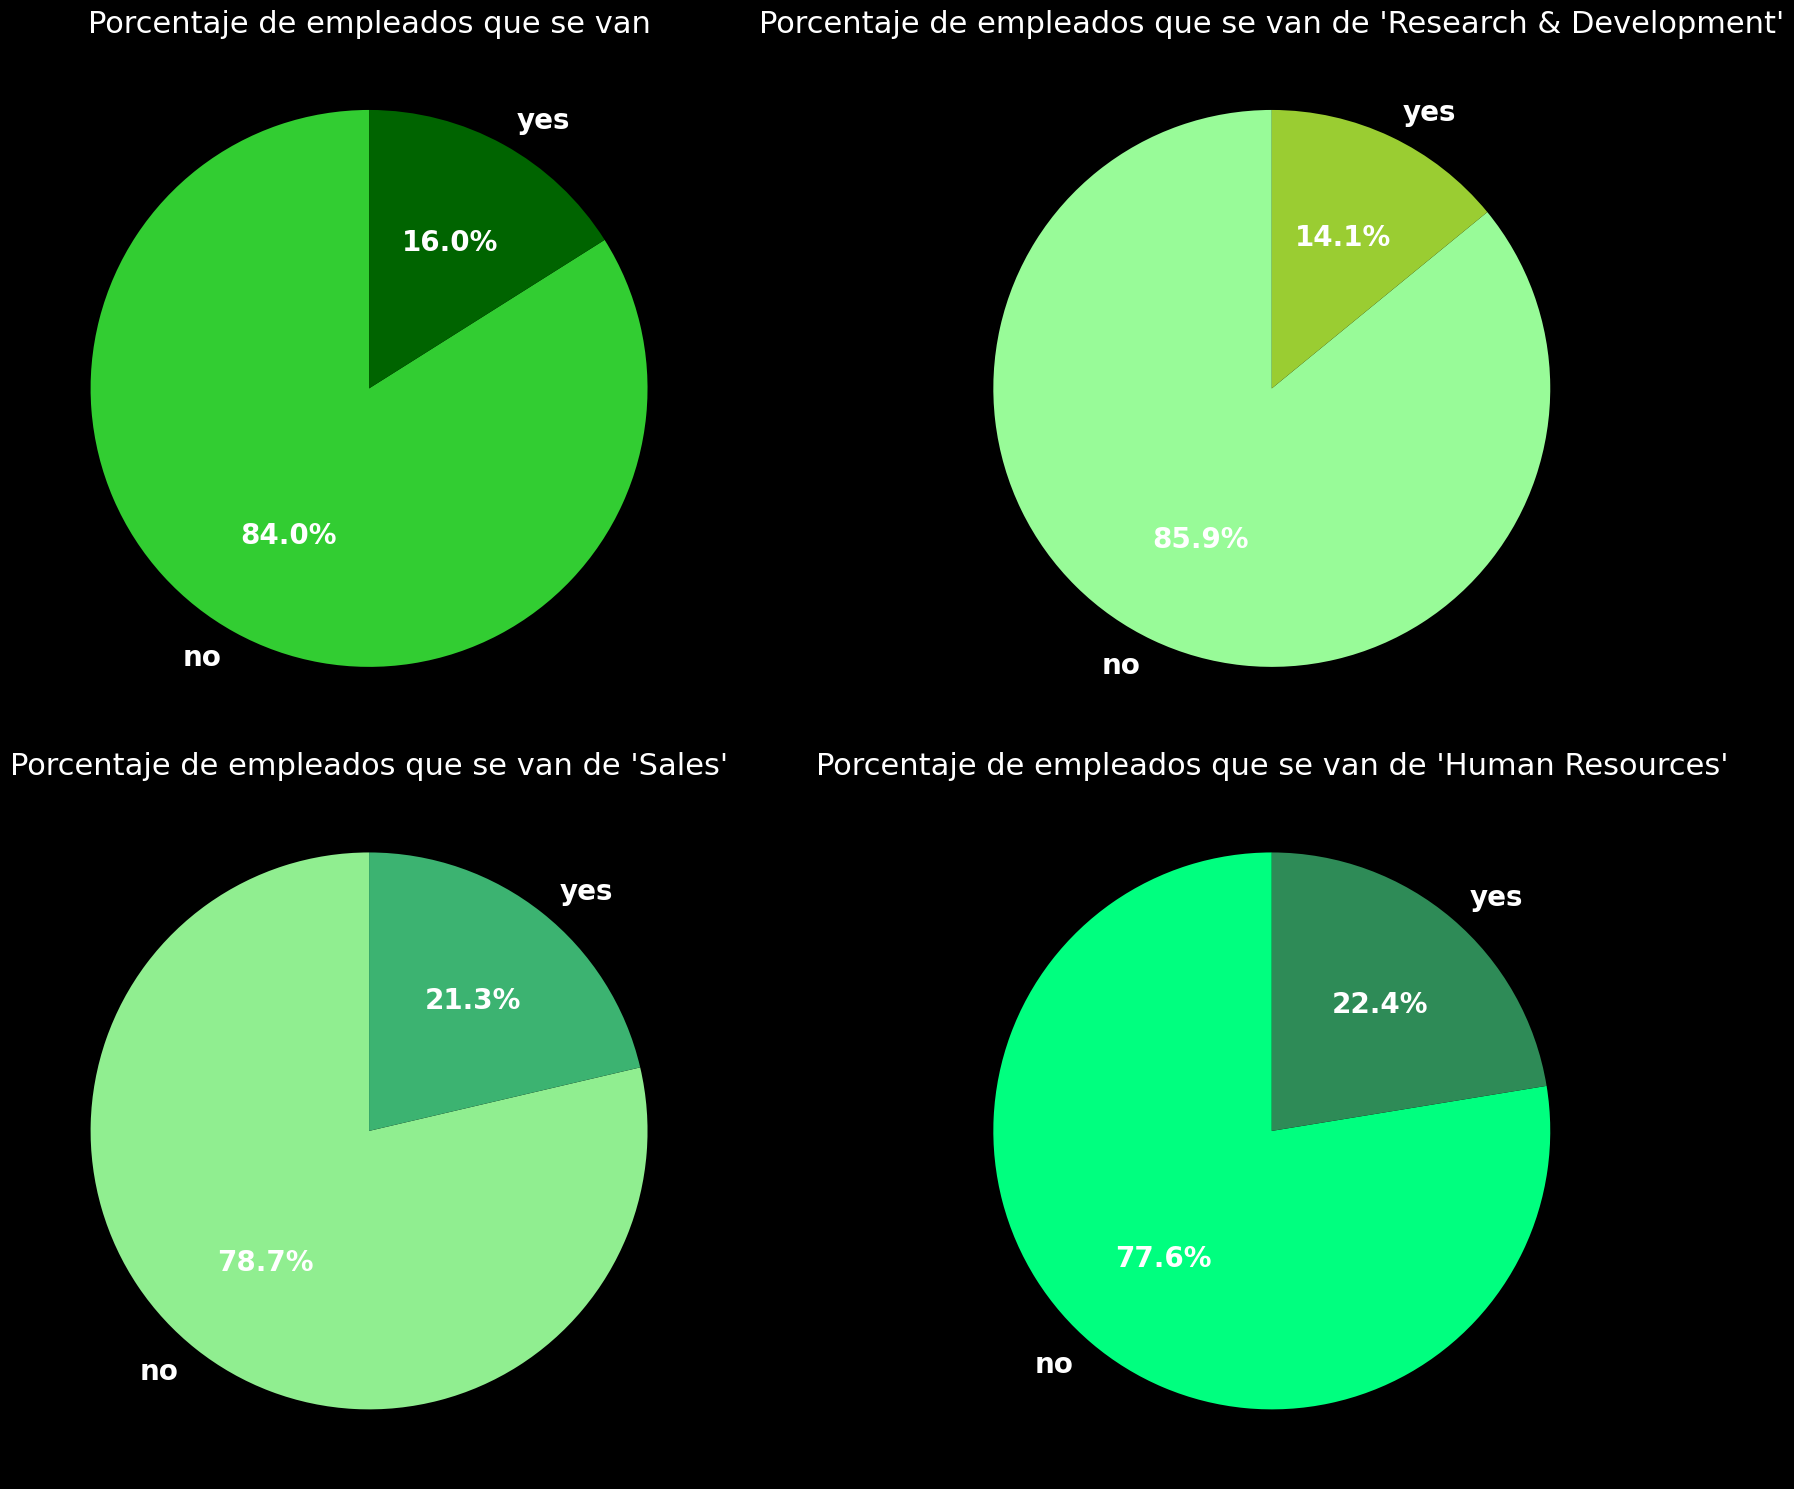

In [ ]:
# Creamos 4 gráficos para ver lo que está pasando, en general:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))

# Fijamos un color de fondo para la figura: 
fig.patch.set_facecolor('black')

# Primero vamos a visualizar en un pie chart el porcentaje de empleados que se van y el que se queda en la empresa:
# Realizamos una agrupación por "attrition":

df_attrition = df.groupby('attrition')['age'].count().reset_index()

# Le pasamos una lista con los dos colores que queremos en el pie chart:
colores = ["limegreen", "darkgreen"]

valores = df_attrition['age']
etiquetas = df_attrition['attrition']

# Creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior en la primera figura:
axes[0,0].pie(valores, labels=etiquetas,
        data = df_attrition, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 20, 'color':'white', 'fontweight': 'bold'}, 
        startangle=90);
        
axes[0,0].set_title("Porcentaje de empleados que se van", color='white', fontsize='22')

# Después hacemos los mismos pasos, pero aplicando una máscara para saber cuántos empleados se van por cada departamento de la empresa:

# Primero creamos la máscara para que nos muestre solo los empleados de "research & development":
df_RD = df[df['department'] == 'research & development']

df_attrition_RD = df_RD.groupby('attrition')['age'].count().reset_index()

# Le pasamos una lista con los dos colores:
colores = ["palegreen", "yellowgreen"]

valores = df_attrition_RD['age']
etiquetas = df_attrition_RD['attrition']

# Creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior:
axes[0,1].pie(valores, labels=etiquetas,
        data = df_attrition_RD, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 20, 'color':'white', 'fontweight': 'bold'}, 
        startangle=90);
        
axes[0,1].set_title("Porcentaje de empleados que se van de 'Research & Development'", color='white', fontsize='22')

# Ahora hacemos lo mismo para los empleados de "sales":
df_sales = df[df['department'] == 'sales']

df_attrition_sales = df_sales.groupby('attrition')['age'].count().reset_index()

# Le pasamos una lista con los dos colores:
colores = ["lightgreen", "mediumseagreen"]

valores = df_attrition_sales['age']
etiquetas = df_attrition_sales['attrition']

# Creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior:
axes[1,0].pie(valores, labels=etiquetas,
        data = df_attrition_sales, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 20, 'color':'white', 'fontweight': 'bold'}, 
        startangle=90);
        
axes[1,0].set_title("Porcentaje de empleados que se van de 'Sales'", color='white', fontsize='22')

# Y, por último, lo mismo para los empleados de "human resources":
df_RH = df[df['department'] == 'human resources']

df_attrition_RH = df_RH.groupby('attrition')['age'].count().reset_index()

# Le pasamos una lista con los dos colores:
colores = ["springgreen", "seagreen"]

valores = df_attrition_RH['age']
etiquetas = df_attrition_RH['attrition']

# Creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior:
axes[1,1].pie(valores, labels=etiquetas,
        data = df_attrition_RH, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 20, 'color':'white', 'fontweight': 'bold'}, 
        startangle=90);
        
axes[1,1].set_title("Porcentaje de empleados que se van de 'Human Resources'", color='white', fontsize='22')


plt.tight_layout()




### Podemos ver que hay más rotación en los departamentos de Recursos Humanos y de Ventas

#### Ahora vamos a analizar el perfil general de los empleados que se van y, posteriormente, nos centraremos en analizar estos dos departamentos con mayor rotación

C:\Users\AIDA\AppData\Local\Temp\ipykernel_660\952055249.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="attrition", y="monthlyincome", data=df, palette = 'Greens')


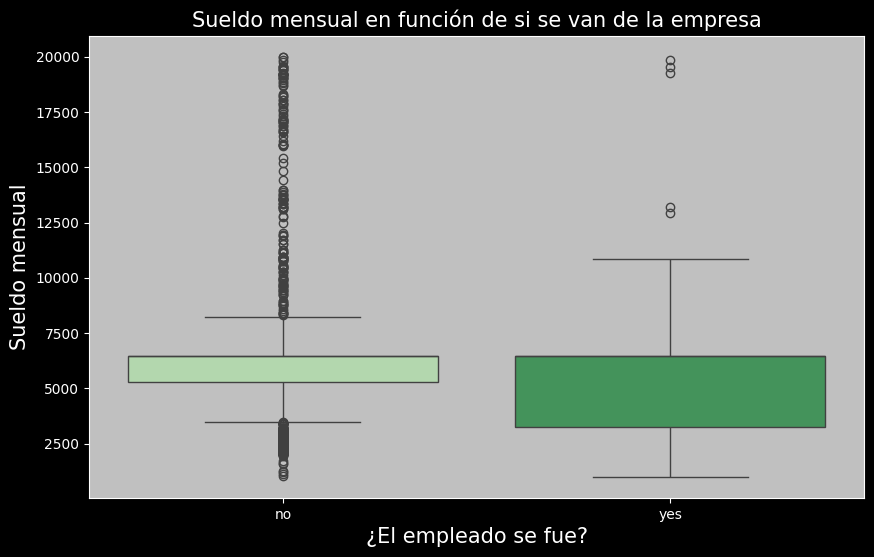

In [ ]:
# Creamos figura para el siguiente gráfico:
fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('black')  # Fondo general figura
ax.set_facecolor('silver')        # Fondo del gráfico (subplot)
    
# Color de ticks (números) y etiquetas: 
ax.tick_params(axis='both', colors='white')  # Ticks de eje x e y
ax.xaxis.label.set_color('white')            # Etiqueta eje x
ax.yaxis.label.set_color('white')            # Etiqueta eje y

# Color de las líneas del eje (spines):
for spine in ax.spines.values():
    spine.set_color('white')

# Vamos a ver los resultados del salario en función de si los empleados se van o se quedan una vez imputados los nulos, para poder comparar con los que ya teníamos antes de imputar los nulos:

sns.boxplot(x="attrition", y="monthlyincome", data=df, palette = 'Greens')
plt.title("Sueldo mensual en función de si se van de la empresa", color='white', fontsize='15')
plt.xlabel("¿El empleado se fue?", fontsize='15')
plt.ylabel("Sueldo mensual", fontsize='15')
plt.show()

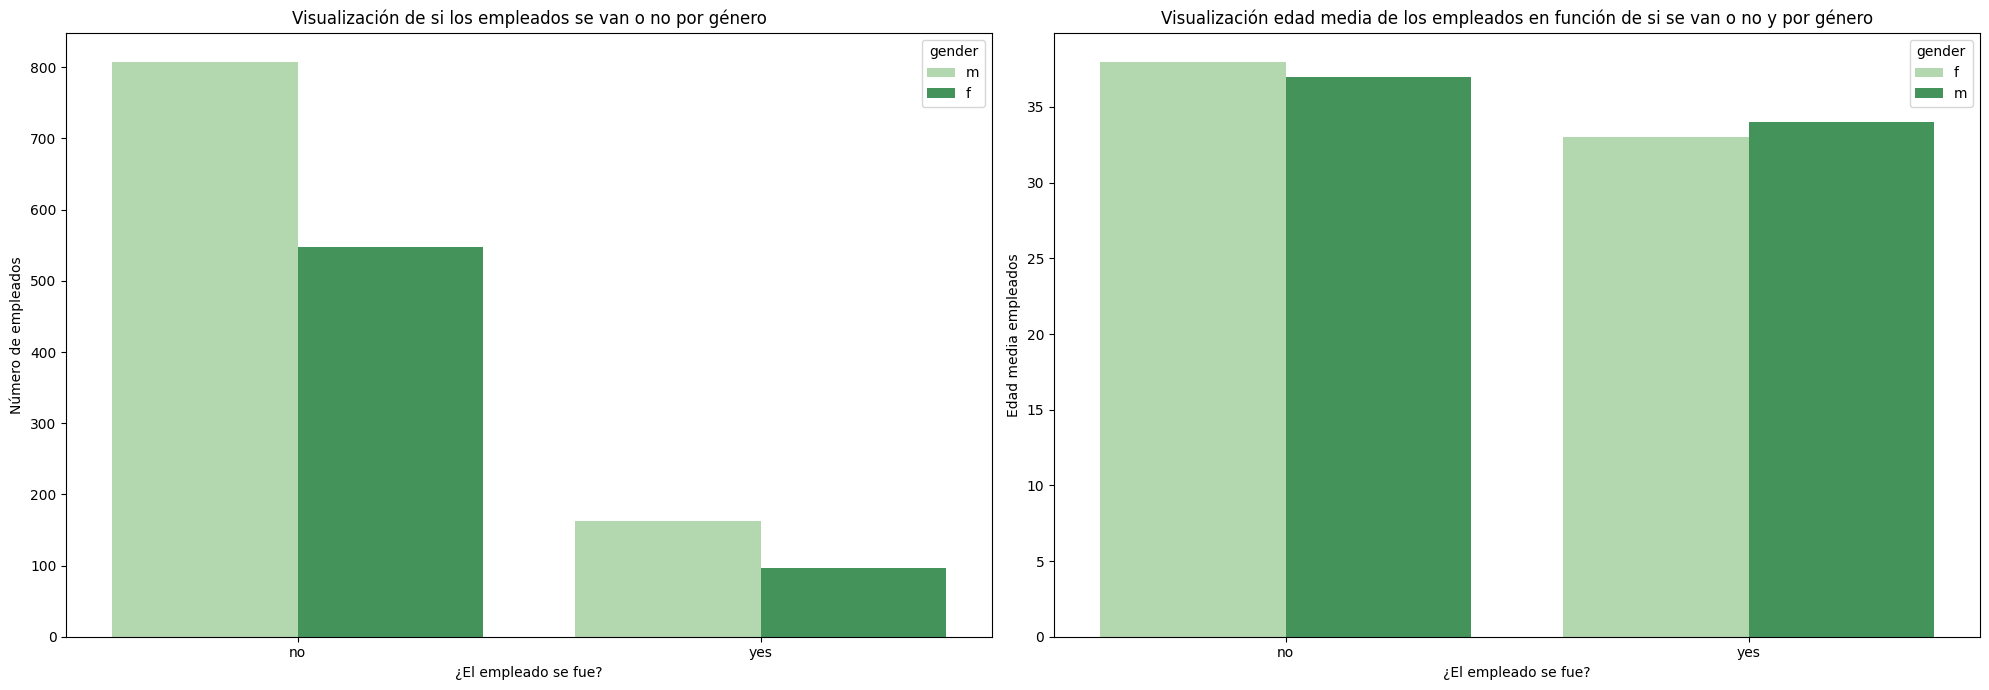

In [ ]:
# Representamos la media de edad de los empleados en función de si se van de la empresa o no y si son hombres o mujeres:

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

# Primero representamos cuántos hombres y mujeres hay en cada grupo:

sns.countplot(x='attrition', data=df, palette='Greens', hue = 'gender', ax = axes[0])
axes[0].set_xlabel("¿El empleado se fue?")
axes[0].set_ylabel("Número de empleados")
axes[0].set_title('Visualización de si los empleados se van o no por género')

# En la otra gráfica mostramos lo mismo, pero por medias de edad:

df_edad_attrition = round(df.groupby(['attrition', 'gender'])['age'].mean().reset_index(),0)

sns.barplot(x='attrition', y= 'age', data=df_edad_attrition, palette='Greens', hue = 'gender', ax = axes[1])
axes[1].set_xlabel("¿El empleado se fue?")
axes[1].set_ylabel("Edad media empleados")
axes[1].set_title('Visualización edad media de los empleados en función de si se van o no y por género')

plt.tight_layout()
plt.show()

### Observamos que se van más hombres y que la edad media de los que se van tiende a ser menor de los que se quedan

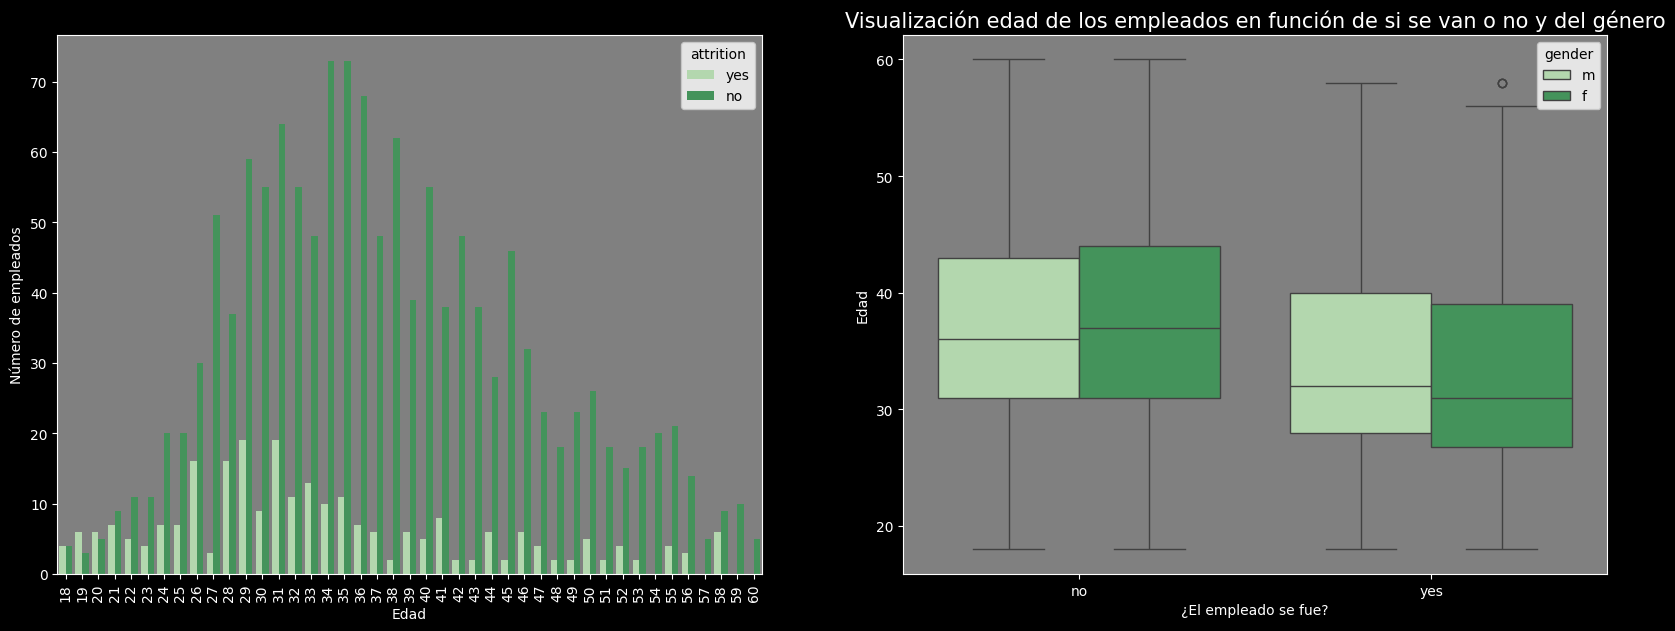

In [ ]:
# Creamos y personalizamos la figura para los siguientes gráficos:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

fig.patch.set_facecolor('black')  
for ax in axes.flat:
    ax.set_facecolor('grey')      
    
for ax in axes:
    ax.tick_params(axis='both', colors='white') 
    ax.xaxis.label.set_color('white')            
    ax.yaxis.label.set_color('white')           

    for spine in ax.spines.values():
        spine.set_color('white')

# En este gráfico también observamos que la mayoría de los empleados que se van tienden a ser más jovenes:

sns.countplot(x='age', data=df, palette='Greens', hue = 'attrition', ax = axes[0])
axes[0].set_xlabel("Edad")
axes[0].tick_params(axis='x', labelrotation=90)
axes[0].set_ylabel("Número de empleados")
axes[0].set_title('Visualización edad de los empleados en función de si se van o no')

# Otra manera gráfica de representarlo teniendo en cuenta el género sería esta:

sns.boxplot(x="attrition", y="age", data=df, hue= 'gender', palette = 'Greens', ax = axes[1])
axes[1].set_title("Visualización edad de los empleados en función de si se van o no y del género", color='white', fontsize='15')
axes[1].set_xlabel("¿El empleado se fue?", color='white', fontsize='10')
axes[1].set_ylabel("Edad", color='white', fontsize='10')

plt.show()

### La tendencia es que los empleados que se van son más jóvenes, pero no hay una diferencia significativa entre géneros


C:\Users\AIDA\AppData\Local\Temp\ipykernel_660\2859172646.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='jobsatisfaction', data=df_satisffaccion_idos, palette='Greens', ax = axes[1])


Text(0.5, 1.0, 'Visualización de si los empleados que se fueron estan satisfechos en el trabajo')

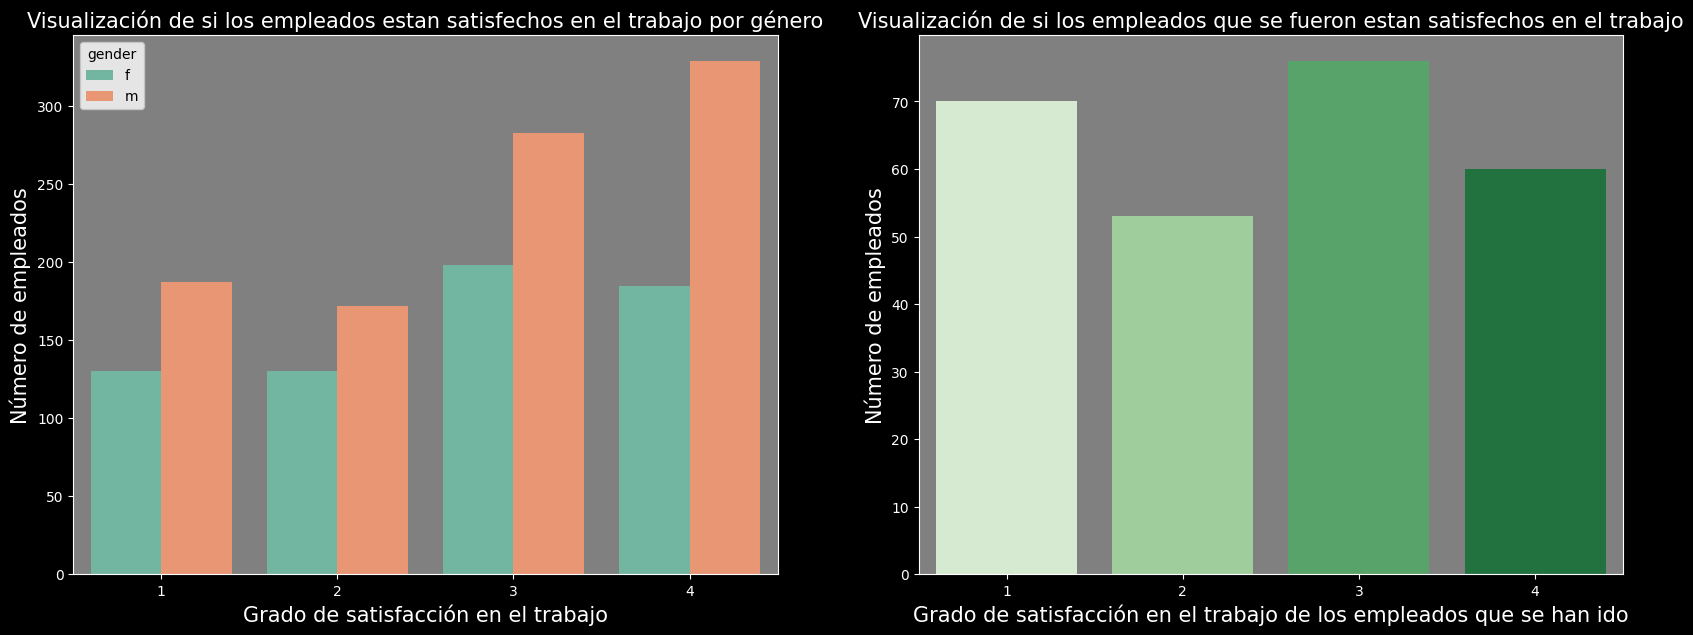

In [ ]:
# Creamos y personalizamos la figura para los siguientes gráficos:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

fig.patch.set_facecolor('black')  
for ax in axes.flat:
    ax.set_facecolor('grey')      
    
for ax in axes: 
    ax.tick_params(axis='both', colors='white')  
    ax.xaxis.label.set_color('white')           
    ax.yaxis.label.set_color('white')            

    for spine in ax.spines.values():
        spine.set_color('white')

# Observamos la satisfacción laboral en función del género y también en función de si se van o no:

sns.countplot(x='jobsatisfaction', data=df, palette='Set2', hue = 'gender', ax = axes[0])
axes[0].set_xlabel("Grado de satisfacción en el trabajo", color='white', fontsize='15')
axes[0].set_ylabel("Número de empleados", color='white', fontsize='15')
axes[0].set_title('Visualización de si los empleados están satisfechos en el trabajo por género', color='white', fontsize='15')

# Ahora haremos lo mismo, pero solo teniendo en cuenta las respuestas de los empleados que se van:

df_satisffaccion_idos = df[df['attrition'] == 'yes']

sns.countplot(x='jobsatisfaction', data=df_satisffaccion_idos, palette='Greens', ax = axes[1])
axes[1].set_xlabel("Grado de satisfacción en el trabajo de los empleados que se han ido", color='white', fontsize='15')
axes[1].set_ylabel("Número de empleados", color='white', fontsize='15')
axes[1].set_title('Visualización de si los empleados que se fueron están satisfechos en el trabajo', color='white', fontsize='15')

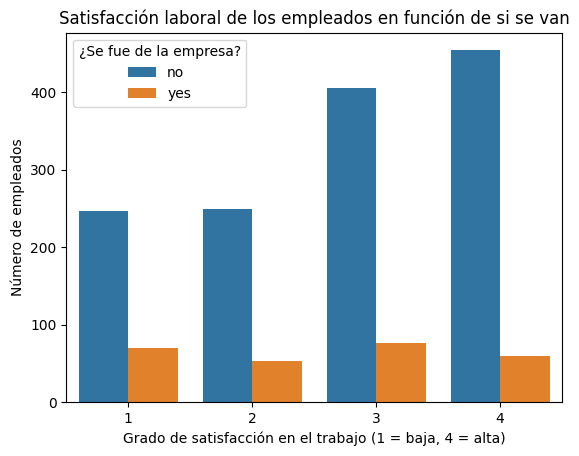

In [8]:
# Lo mismo sin separar por género. Satisfacción laboral en función de si se van o se quedan:

sns.countplot(x="jobsatisfaction", hue="attrition", data=df)
plt.title("Satisfacción laboral de los empleados en función de si se van")
plt.xlabel("Grado de satisfacción en el trabajo (1 = baja, 4 = alta)")
plt.ylabel("Número de empleados")
plt.legend(title="¿Se fue de la empresa?")
plt.show()

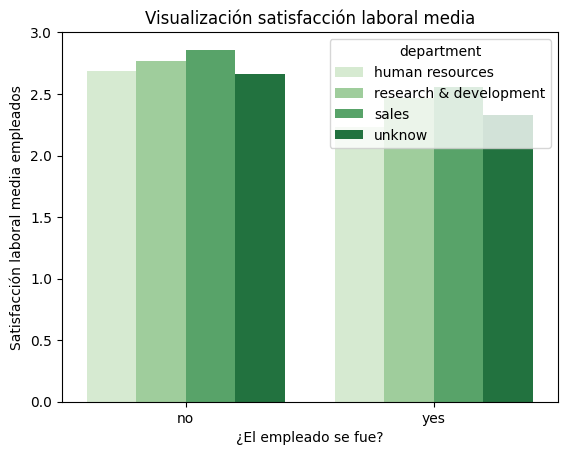

In [ ]:
# Comparar la media de satisfacción laboral según "attrition" y "department":

df_satisfaccion_dep = df.groupby(["attrition","department"])["jobsatisfaction"].mean().round(2).reset_index()

sns.barplot(x='attrition', y= 'jobsatisfaction', data=df_satisfaccion_dep, palette='Greens', hue = 'department')
plt.xlabel("¿El empleado se fue?")
plt.ylabel("Satisfacción laboral media empleados")
plt.title('Visualización satisfacción laboral media')

plt.show()

C:\Users\AIDA\AppData\Local\Temp\ipykernel_660\2659981574.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y= 'jobsatisfaction', data=df_satisfaccion_dep, palette='Greens')


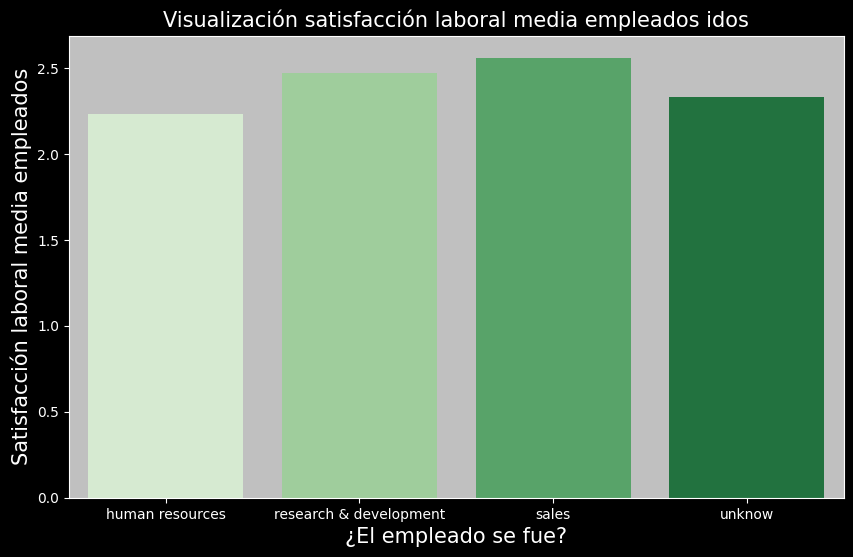

In [ ]:
# Vamos a representar lo mismo, pero solo teniendo en cuenta los empleados que se han ido, para que sea más visual:
# Creamos y personalizamos la figura para el siguiente gráfico:
fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('black')  
ax.set_facecolor('silver')        
    
ax.tick_params(axis='both', colors='white') 
ax.xaxis.label.set_color('white')            
ax.yaxis.label.set_color('white')          

for spine in ax.spines.values():
    spine.set_color('white')

df_satisffaccion_laboral_idos = df[df['attrition'] == 'yes']
df_satisfaccion_dep = df_satisffaccion_laboral_idos.groupby("department")["jobsatisfaction"].mean().round(2).reset_index()

sns.barplot(x='department', y= 'jobsatisfaction', data=df_satisfaccion_dep, palette='Greens')
plt.xlabel("¿El empleado se fue?", color='white', fontsize='15')
plt.ylabel("Satisfacción laboral media empleados", color='white', fontsize='15')
plt.title('Visualización satisfacción laboral media empleados idos', color='white', fontsize='15')

plt.show()

### En general, el grado de satisfacción en el trabajo tiende a ser bueno, pero si miramos solo las encuestas de satisfacción de los empleados que se han ido sí que aumentan considerablemente aquellos empleados que no estan tan satisfechos en el trabajo

Text(0.5, 1.0, 'Visualización de si los empleados que se fueron estan satisfechos con las relaciones laborales')

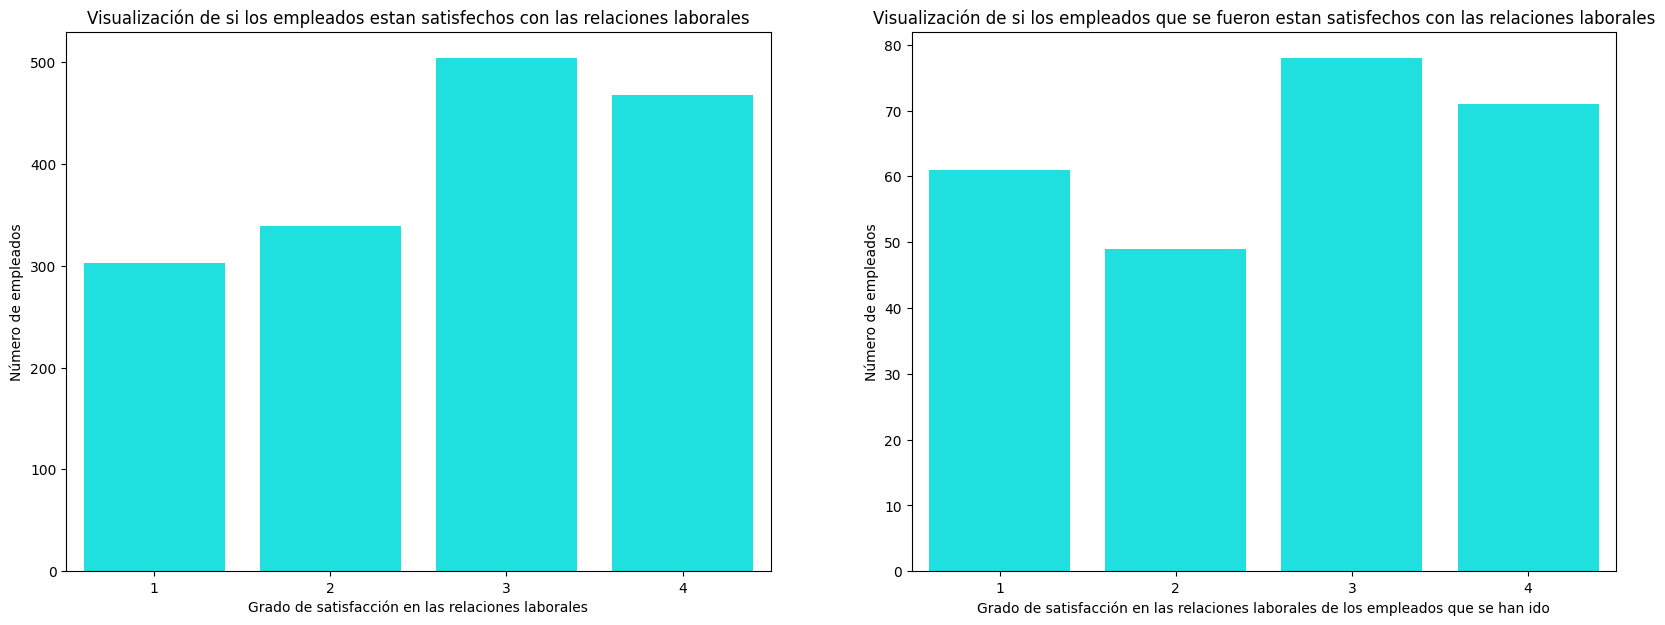

In [ ]:
# Observamos la satisfacción en las relaciones laborales en función de si se van o no:
# Creamos y personalizamos la figura para los siguientes gráficos:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

sns.countplot(x='relationshipsatisfaction', data=df, color= 'aqua', ax = axes[0])
axes[0].set_xlabel("Grado de satisfacción en las relaciones laborales")
axes[0].set_ylabel("Número de empleados")
axes[0].set_title('Visualización de si los empleados están satisfechos con las relaciones laborales')

# Ahora haremos lo mismo, pero solo teniendo en cuenta las respuestas de los empleados que se van:

df_satisffaccion_relaciones_idos = df[df['attrition'] == 'yes']

sns.countplot(x='relationshipsatisfaction', data=df_satisffaccion_relaciones_idos, color= 'aqua', ax = axes[1])
axes[1].set_xlabel("Grado de satisfacción en las relaciones laborales de los empleados que se han ido")
axes[1].set_ylabel("Número de empleados")
axes[1].set_title('Visualización de si los empleados que se fueron están satisfechos con las relaciones laborales')

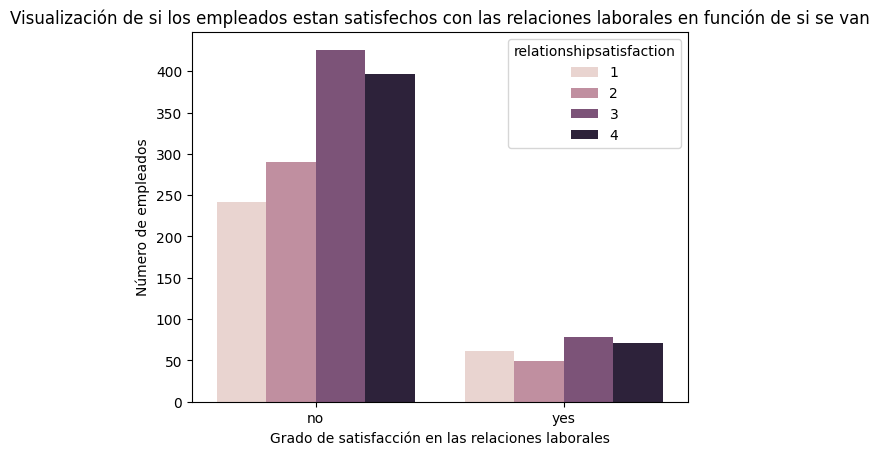

In [ ]:
sns.countplot(x='attrition', hue='relationshipsatisfaction', data=df)
plt.xlabel("Grado de satisfacción en las relaciones laborales")
plt.ylabel("Número de empleados")
plt.title('Visualización de si los empleados están satisfechos con las relaciones laborales en función de si se van')
plt.show()

### En este caso también aumenta un poco el grado de satisfacción 1, si tenemos en cuenta solo las respuestas de los que se han ido

C:\Users\AIDA\AppData\Local\Temp\ipykernel_660\120400171.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='environmentsatisfaction', data=df_satisffaccion_ambiente_idos, palette='GnBu', ax = axes[1])


Text(0.5, 1.0, 'Visualización de si los empleados que se fueron estan satisfechos con el ambiente laboral')

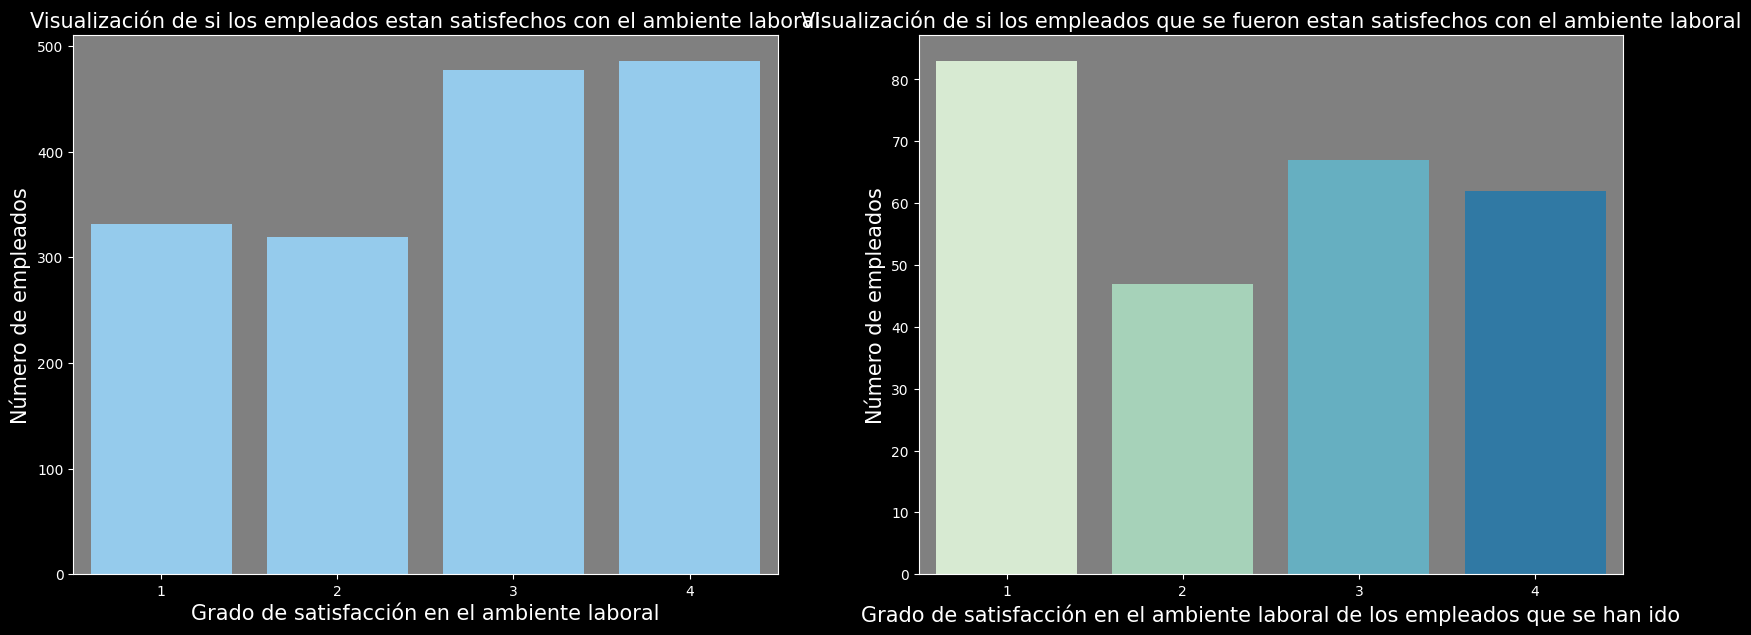

In [ ]:
# Creamos y personalizamos la figura para los siguientes gráficos:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

fig.patch.set_facecolor('black')  
for ax in axes.flat:
    ax.set_facecolor('grey')      
    
for ax in axes:
    ax.tick_params(axis='both', colors='white') 
    ax.xaxis.label.set_color('white')            
    ax.yaxis.label.set_color('white')           
    
    for spine in ax.spines.values():
        spine.set_color('white')

# Observamos la satisfacción en el ambiente laboral en función de si se van o no:

sns.countplot(x='environmentsatisfaction', data=df, color= 'lightskyblue', ax = axes[0])
axes[0].set_xlabel("Grado de satisfacción en el ambiente laboral", color='white', fontsize='15')
axes[0].set_ylabel("Número de empleados", color='white', fontsize='15')
axes[0].set_title('Visualización de si los empleados están satisfechos con el ambiente laboral', color='white', fontsize='15')

# Ahora haremos lo mismo, pero solo teniendo en cuenta las respuestas de los empleados que se van:

df_satisffaccion_ambiente_idos = df[df['attrition'] == 'yes']

sns.countplot(x='environmentsatisfaction', data=df_satisffaccion_ambiente_idos, palette='GnBu', ax = axes[1])
axes[1].set_xlabel("Grado de satisfacción en el ambiente laboral de los empleados que se han ido", color='white', fontsize='15')
axes[1].set_ylabel("Número de empleados", color='white', fontsize='15')
axes[1].set_title('Visualización de si los empleados que se fueron están satisfechos con el ambiente laboral', color='white', fontsize='15')

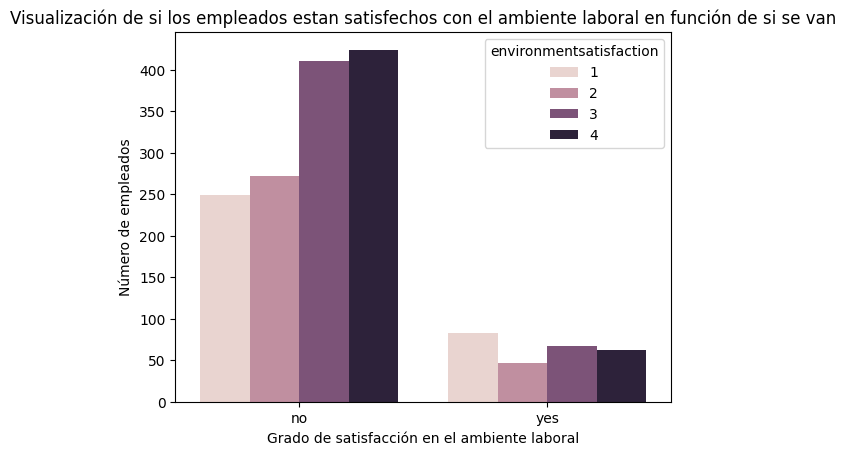

In [ ]:
sns.countplot(x='attrition', hue='environmentsatisfaction', data=df)
plt.xlabel("Grado de satisfacción en el ambiente laboral")
plt.ylabel("Número de empleados")
plt.title('Visualización de si los empleados están satisfechos con el ambiente laboral en función de si se van')
plt.show()

### En este caso sí que vemos que hay diferencia significativa. Si nos fijamos en los empleados que se han ido, la mayoría opinaba que el ambiente laboral no era bueno

Text(0.5, 1.0, 'Visualización de si los empleados que se fueron creen que estaban implicados con el trabajo')

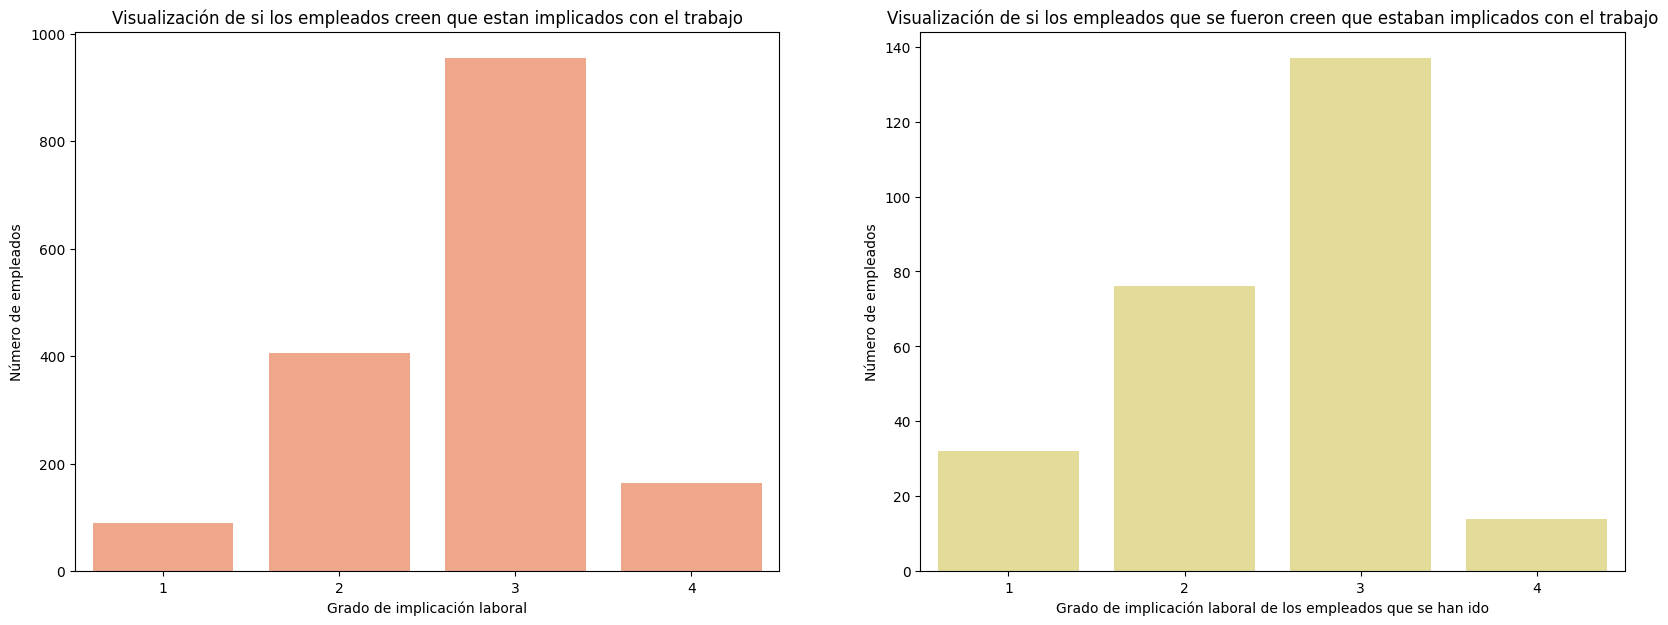

In [ ]:
# Observamos la implicación laboral de los empleados en función de si se van o no:
# Creamos y personalizamos la figura para los siguientes gráficos:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

sns.countplot(x='jobinvolvement', data=df, color= 'lightsalmon', ax = axes[0])
axes[0].set_xlabel("Grado de implicación laboral")
axes[0].set_ylabel("Número de empleados")
axes[0].set_title('Visualización de si los empleados creen que están implicados con el trabajo')

# Ahora haremos lo mismo, pero solo teniendo en cuenta las respuestas de los empleados que se van:

df_implicacion_idos = df[df['attrition'] == 'yes']

sns.countplot(x='jobinvolvement', data=df_implicacion_idos, color= 'khaki', ax = axes[1])
axes[1].set_xlabel("Grado de implicación laboral de los empleados que se han ido")
axes[1].set_ylabel("Número de empleados")
axes[1].set_title('Visualización de si los empleados que se fueron creen que estaban implicados con el trabajo')

### No vemos diferencias en el grado de implicación laboral

Text(0.5, 1.0, 'Visualización del equilibrio vida-trabajo de los empleados que se fueron')

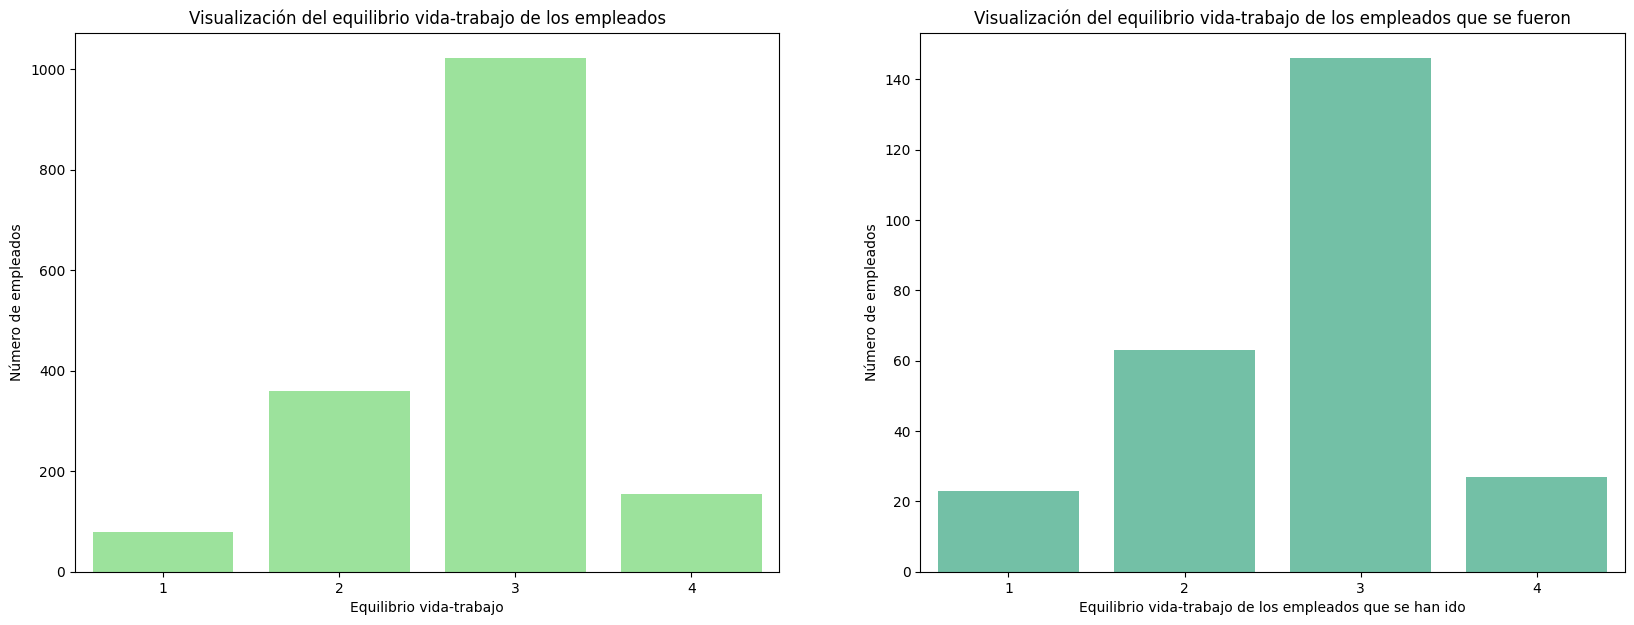

In [ ]:
# Analizamos el equilibrio vida-trabajo de los empleados en función de si se van o no:
# Creamos y personalizamos la figura para los siguientes gráficos:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

sns.countplot(x='worklifebalance', data=df, color= 'lightgreen', ax = axes[0])
axes[0].set_xlabel("Equilibrio vida-trabajo")
axes[0].set_ylabel("Número de empleados")
axes[0].set_title('Visualización del equilibrio vida-trabajo de los empleados')

# Ahora haremos lo mismo, pero solo teniendo en cuenta las respuestas de los empleados que se van:

df_equilibrio_idos = df[df['attrition'] == 'yes']

sns.countplot(x='worklifebalance', data=df_equilibrio_idos, color= 'mediumaquamarine', ax = axes[1])
axes[1].set_xlabel("Equilibrio vida-trabajo de los empleados que se han ido")
axes[1].set_ylabel("Número de empleados")
axes[1].set_title('Visualización del equilibrio vida-trabajo de los empleados que se fueron')

### No parece que el equilibrio vida-trabajo influya

<function matplotlib.pyplot.show(close=None, block=None)>

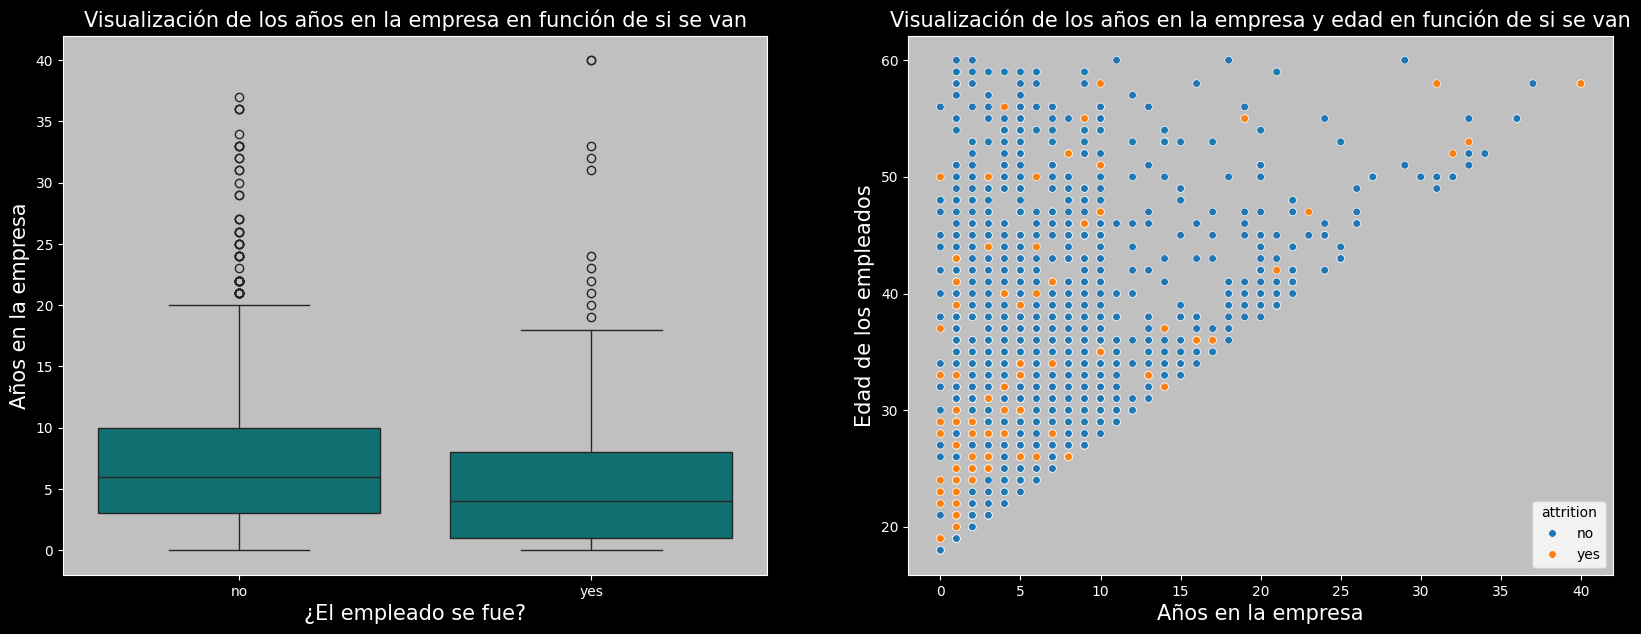

In [ ]:
# Creamos y personalizamos la figura para los siguientes gráficos:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

fig.patch.set_facecolor('black')  
for ax in axes.flat:
    ax.set_facecolor('silver')    
    
for ax in axes:
    ax.tick_params(axis='both', colors='white')  
    ax.xaxis.label.set_color('white')            
    ax.yaxis.label.set_color('white')           

    for spine in ax.spines.values():
        spine.set_color('white')

# Valoramos los años que lleva un trabajador en la empresa en función de si se va o se queda:

sns.boxplot(x="attrition", y="yearsatcompany", data=df, color = 'teal', ax = axes[0])
axes[0].set_title("Visualización de los años en la empresa en función de si se van", color='white', fontsize='15')
axes[0].set_xlabel("¿El empleado se fue?", color='white', fontsize='15')
axes[0].set_ylabel("Años en la empresa", color='white', fontsize='15')

# Valoramos los años que lleva un trabajador en la empresa y la edad de este en función de si se va o se queda:

sns.scatterplot(x='yearsatcompany', y='age', hue='attrition', data=df, s=30, ax = axes[1])
axes[1].set_xlabel("Años en la empresa", color='white', fontsize='15')
axes[1].set_ylabel("Edad de los empleados", color='white', fontsize='15')
axes[1].set_title('Visualización de los años en la empresa y edad en función de si se van', color='white', fontsize='15')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

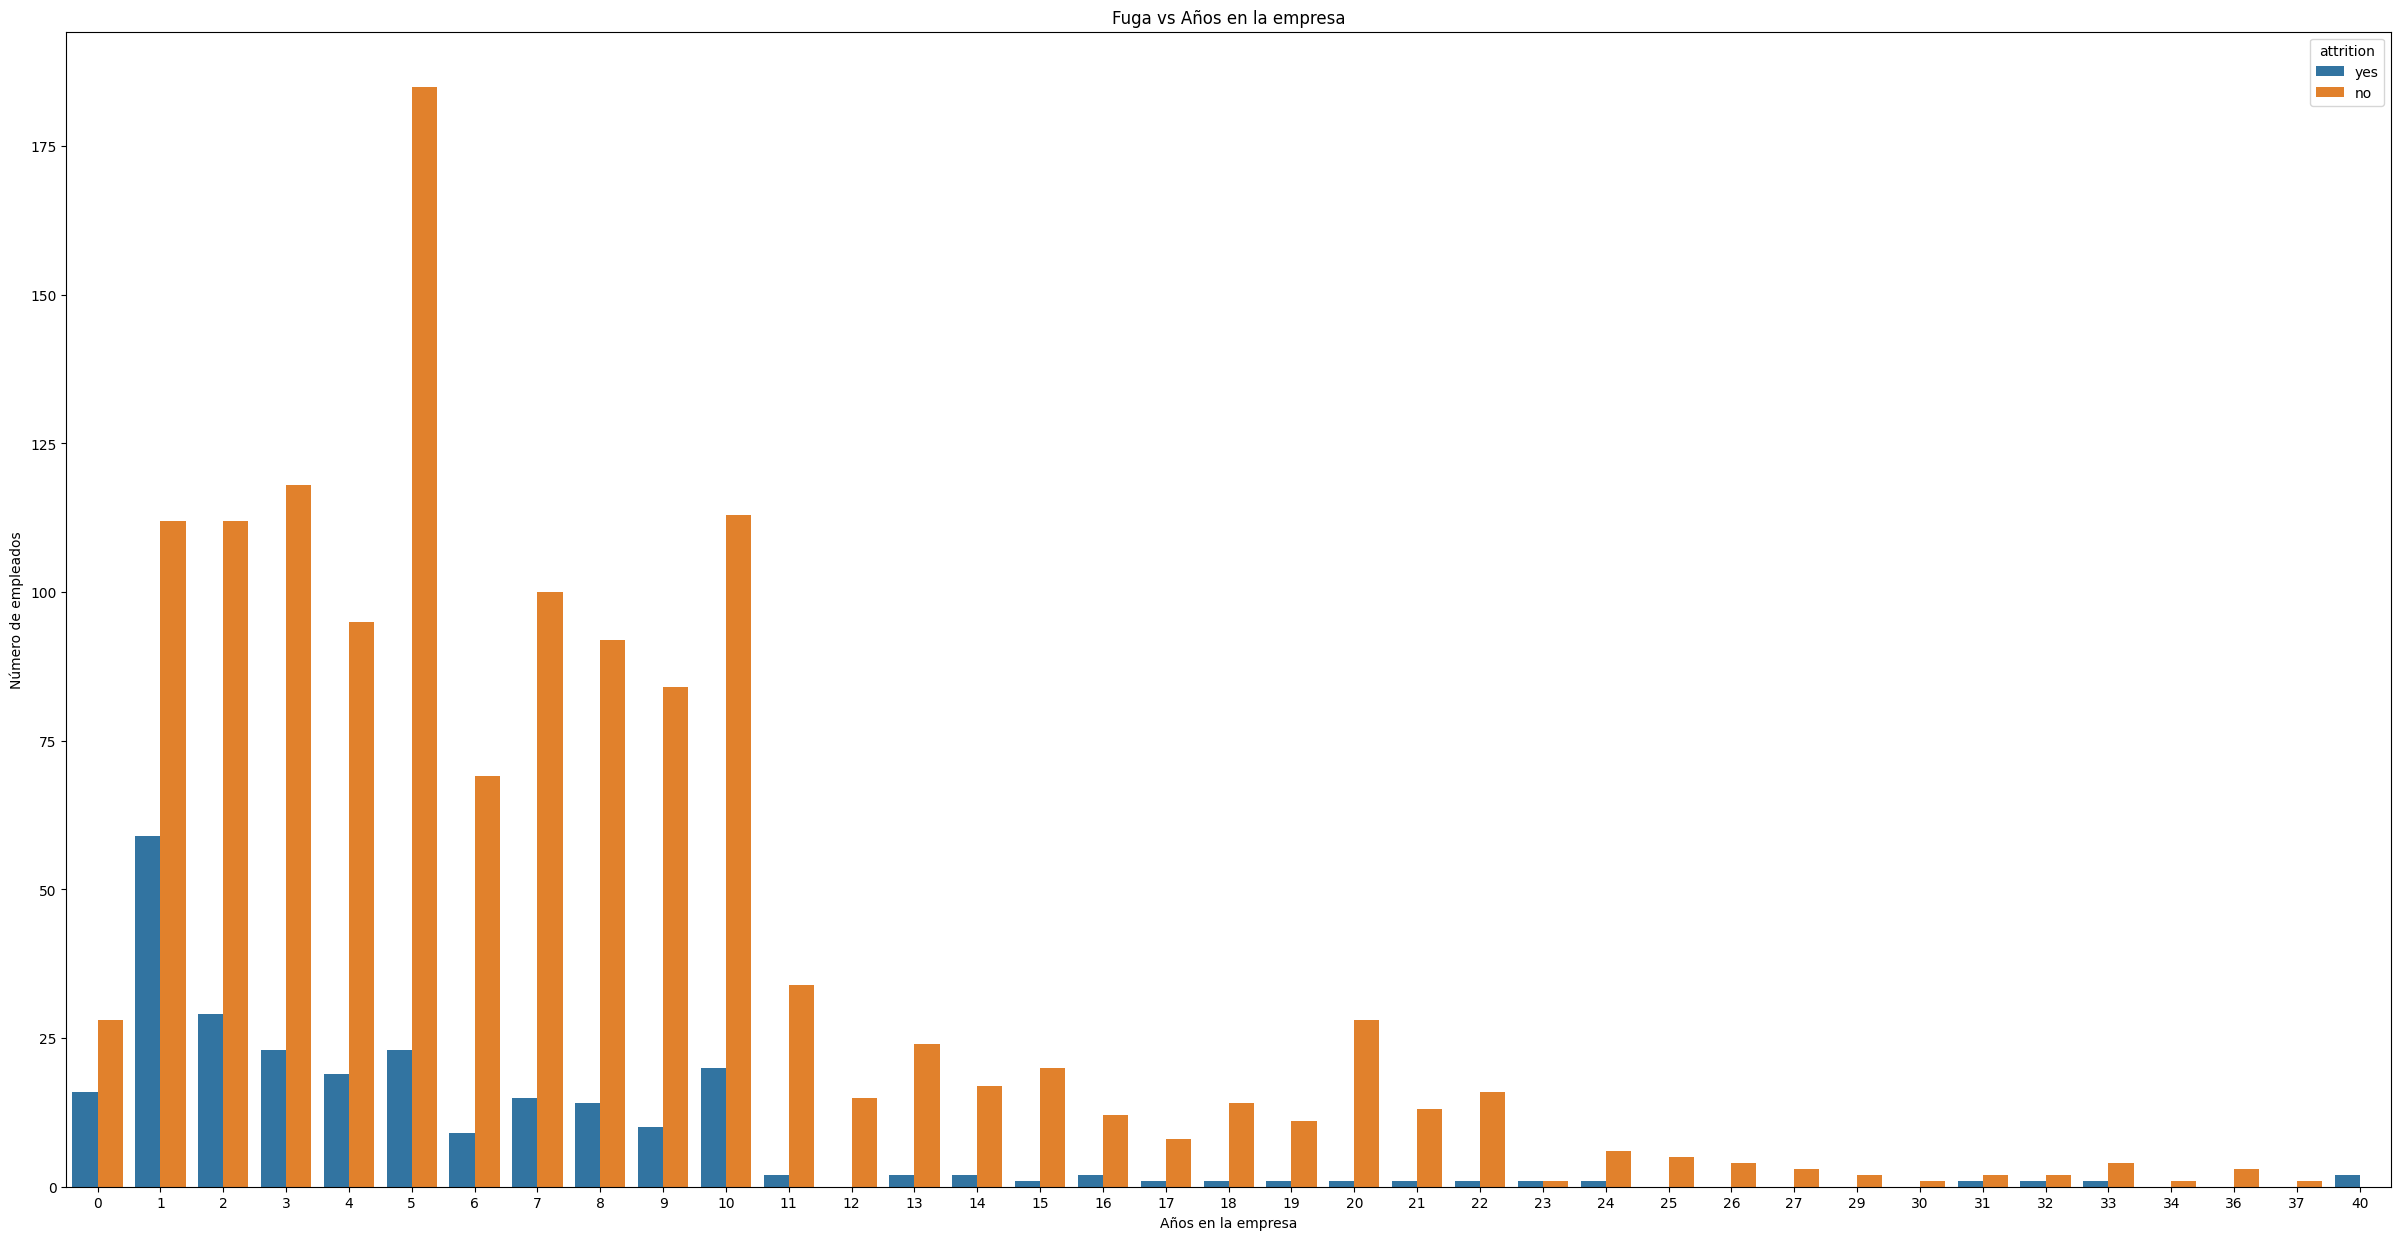

In [18]:
# Representación de cuántos empleados se van en función de los años que llevan en la empresa:

plt.figure(figsize=(30, 15))
sns.countplot(data=df, x="yearsatcompany", hue="attrition")
plt.title("Fuga vs Años en la empresa")
plt.xlabel("Años en la empresa")
plt.ylabel("Número de empleados")
plt.show

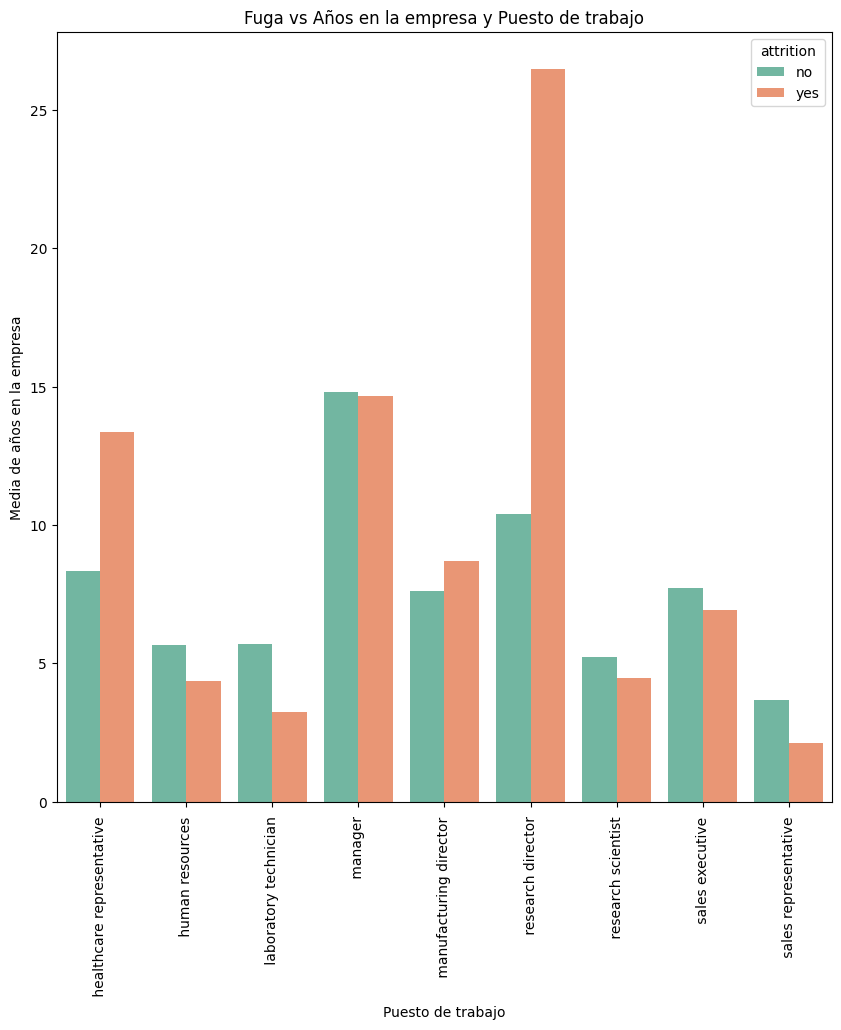

In [19]:
# Años en la empresa en función del puesto de trabajo y de si se van o no: 

plt.figure(figsize=(10, 10))

df_antigüedad_puesto = df.groupby(['jobrole', 'attrition'])['yearsatcompany'].mean().reset_index()
sns.barplot(data=df_antigüedad_puesto, y='yearsatcompany', x='jobrole', hue="attrition", palette='Set2')
plt.xlabel('Puesto de trabajo')
plt.ylabel('Media de años en la empresa')
plt.title("Fuga vs Años en la empresa y Puesto de trabajo")
plt.xticks(rotation=90)
plt.show()

### Los empleados que se van tienden a ser más jóvenes y a llevar pocos años en la empresa

C:\Users\AIDA\AppData\Local\Temp\ipykernel_660\946175606.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='jobrole', data=df_jobrole_RD_idos, palette= 'Greens', ax = axes[0,1])
C:\Users\AIDA\AppData\Local\Temp\ipykernel_660\946175606.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='jobrole', data=df_jobrole_sales_idos, palette= 'Greens', ax = axes[1,0])


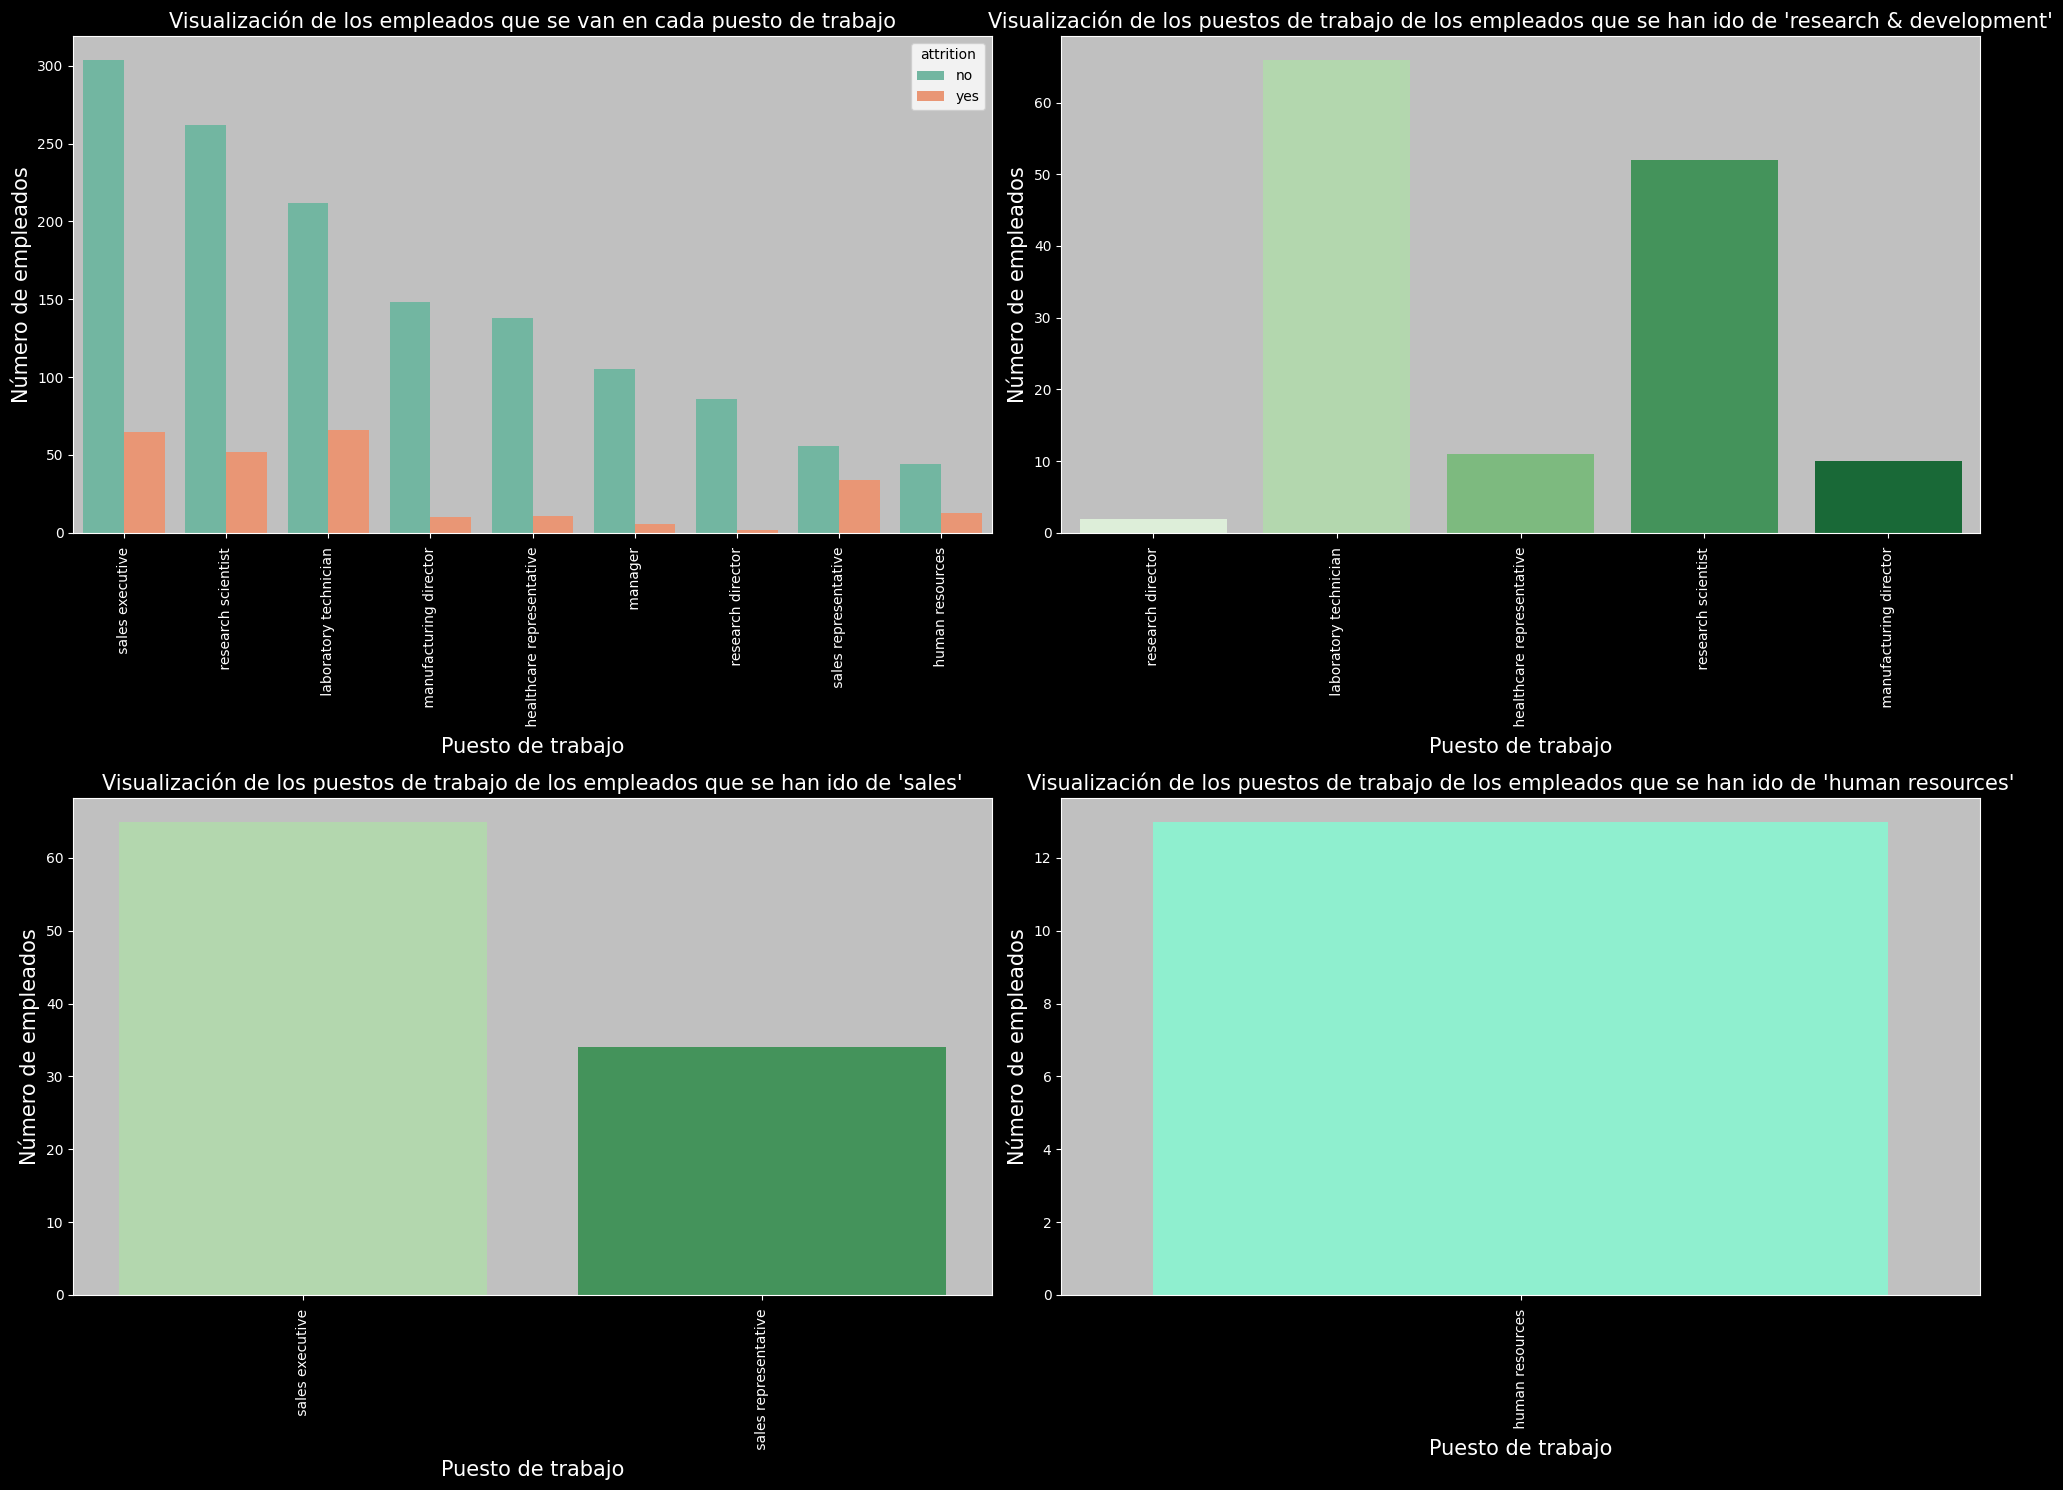

In [ ]:
# Creamos y personalizamos la figura para los siguientes gráficos:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))

fig.patch.set_facecolor('black')

for ax in axes.flatten():
    ax.set_facecolor('silver')

    for spine in ax.spines.values():
        spine.set_color('white')

    ax.tick_params(colors='white', which='both') 
    ax.xaxis.label.set_color('white')             
    ax.yaxis.label.set_color('white')             
    ax.title.set_color('white')                   

# Ahora representamos, de cada puesto de trabajo, cuántos empleados se van y cuántos se quedan:

df_jobrole = df.groupby(['jobrole', 'attrition'])['age'].count().reset_index().sort_values(by= 'age', ascending=False)

sns.barplot(x='jobrole', y='age', data=df_jobrole, palette='Set2', hue = 'attrition', ax = axes[0,0])
axes[0,0].set_xlabel("Puesto de trabajo", color='white', fontsize='15')
axes[0,0].set_ylabel("Número de empleados", color='white', fontsize='15')
axes[0,0].set_title('Visualización de los empleados que se van en cada puesto de trabajo', color='white', fontsize='15')
axes[0,0].tick_params(axis='x', labelrotation=90)

# Ahora haremos lo mismo, pero solo teniendo en cuenta las respuestas de los empleados que se van de los diferentes departamentos:

df_jobrole_RD_idos = df[(df['attrition'] == 'yes') & (df['department'] == 'research & development')]

sns.countplot(x='jobrole', data=df_jobrole_RD_idos, palette= 'Greens', ax = axes[0,1])
axes[0,1].set_xlabel("Puesto de trabajo", color='white', fontsize='15')
axes[0,1].set_ylabel("Número de empleados", color='white', fontsize='15')
axes[0,1].set_title("Visualización de los puestos de trabajo de los empleados que se han ido de 'research & development'", color='white', fontsize='15')
axes[0,1].tick_params(axis='x', labelrotation=90)

# Ahora para "sales":

df_jobrole_sales_idos = df[(df['attrition'] == 'yes') & (df['department'] == 'sales')]

sns.countplot(x='jobrole', data=df_jobrole_sales_idos, palette= 'Greens', ax = axes[1,0])
axes[1,0].set_xlabel("Puesto de trabajo", color='white', fontsize='15')
axes[1,0].set_ylabel("Número de empleados", color='white', fontsize='15')
axes[1,0].set_title("Visualización de los puestos de trabajo de los empleados que se han ido de 'sales'", color='white', fontsize='15')
axes[1,0].tick_params(axis='x', labelrotation=90)

# Ahora para "human resources":

df_jobrole_RH_idos = df[(df['attrition'] == 'yes') & (df['department'] == 'human resources')]

sns.countplot(x='jobrole', data=df_jobrole_RH_idos, color = 'aquamarine', ax = axes[1,1])
axes[1,1].set_xlabel("Puesto de trabajo", color='white', fontsize='15')
axes[1,1].set_ylabel("Número de empleados", color='white', fontsize='15')
axes[1,1].set_title("Visualización de los puestos de trabajo de los empleados que se han ido de 'human resources'", color='white', fontsize='15')
axes[1,1].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

C:\Users\AIDA\AppData\Local\Temp\ipykernel_660\52597811.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='joblevel', data=df_jobrole_RD_idos, palette = 'YlGnBu', ax = axes[0,1])
C:\Users\AIDA\AppData\Local\Temp\ipykernel_660\52597811.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='joblevel', data=df_jobrole_sales_idos, palette = 'YlGnBu', ax = axes[1,0])
C:\Users\AIDA\AppData\Local\Temp\ipykernel_660\52597811.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='joblevel', data=df_jobrole_RH_idos, palette = 'YlGnBu', ax

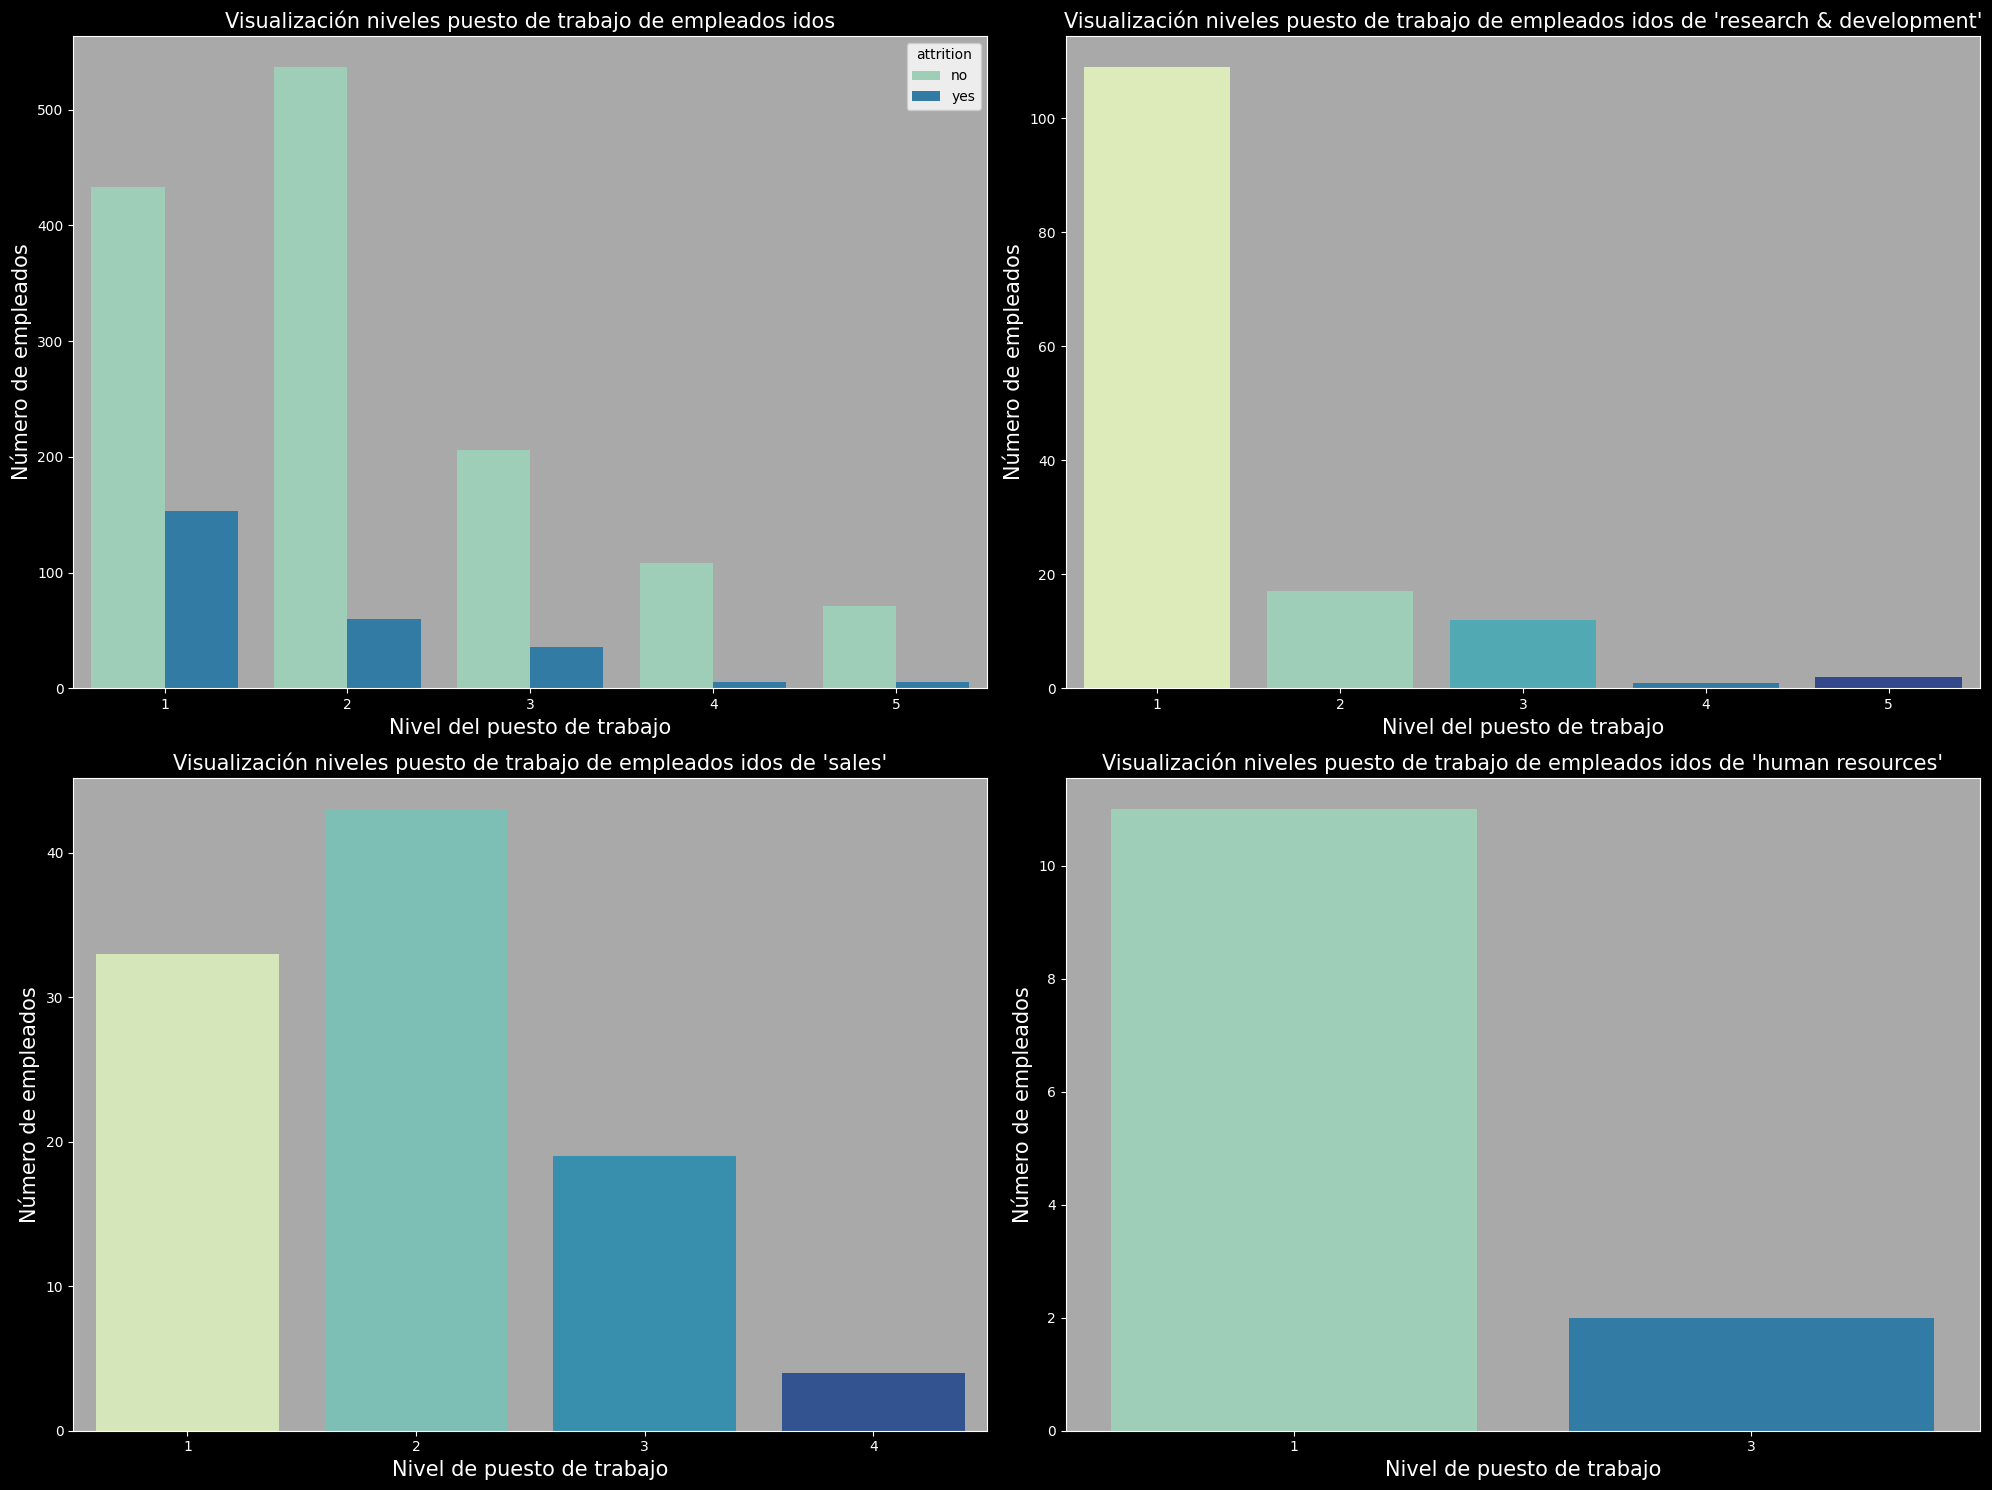

In [ ]:
# Según el nivel del puesto de trabajo:
# Creamos y personalizamos la figura para los siguientes gráficos:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))

fig.patch.set_facecolor('black')

for ax in axes.flatten():
    ax.set_facecolor('darkgrey')

    for spine in ax.spines.values():
        spine.set_color('white')

    ax.tick_params(colors='white', which='both') 
    ax.xaxis.label.set_color('white')             
    ax.yaxis.label.set_color('white')             
    ax.title.set_color('white')                    

# Ahora representamos, de cada nivel de puesto de trabajo, cuántos empleados se van y cuántos se quedan:

df_jobrole = df.groupby(['joblevel', 'attrition'])['age'].count().reset_index().sort_values(by= 'age', ascending=False)

sns.barplot(x='joblevel', y='age', data=df_jobrole, palette='YlGnBu', hue = 'attrition', ax = axes[0,0])
axes[0,0].set_xlabel("Nivel del puesto de trabajo", color='white', fontsize='15')
axes[0,0].set_ylabel("Número de empleados", color='white', fontsize='15')
axes[0,0].set_title('Visualización niveles puesto de trabajo de empleados idos', color='white', fontsize='15')

# Ahora haremos lo mismo, pero solo teniendo en cuenta las respuestas de los empleados que se van de los diferentes departamentos:

df_jobrole_RD_idos = df[(df['attrition'] == 'yes') & (df['department'] == 'research & development')]

sns.countplot(x='joblevel', data=df_jobrole_RD_idos, palette = 'YlGnBu', ax = axes[0,1])
axes[0,1].set_xlabel("Nivel del puesto de trabajo", color='white', fontsize='15')
axes[0,1].set_ylabel("Número de empleados", color='white', fontsize='15')
axes[0,1].set_title("Visualización niveles puesto de trabajo de empleados idos de 'research & development'", color='white', fontsize='15')

# Ahora para "sales":

df_jobrole_sales_idos = df[(df['attrition'] == 'yes') & (df['department'] == 'sales')]

sns.countplot(x='joblevel', data=df_jobrole_sales_idos, palette = 'YlGnBu', ax = axes[1,0])
axes[1,0].set_xlabel("Nivel de puesto de trabajo", color='white', fontsize='15')
axes[1,0].set_ylabel("Número de empleados", color='white', fontsize='15')
axes[1,0].set_title("Visualización niveles puesto de trabajo de empleados idos de 'sales'", color='white', fontsize='15')

# Ahora para "human resources":

df_jobrole_RH_idos = df[(df['attrition'] == 'yes') & (df['department'] == 'human resources')]

sns.countplot(x='joblevel', data=df_jobrole_RH_idos, palette = 'YlGnBu', ax = axes[1,1])
axes[1,1].set_xlabel("Nivel de puesto de trabajo", color='white', fontsize='15')
axes[1,1].set_ylabel("Número de empleados", color='white', fontsize='15')
axes[1,1].set_title("Visualización niveles puesto de trabajo de empleados idos de 'human resources'", color='white', fontsize='15')

plt.tight_layout()
plt.show()



### Todos los departamentos siguen la misma tendencia: Se van más empleados de nivel 1 o 2

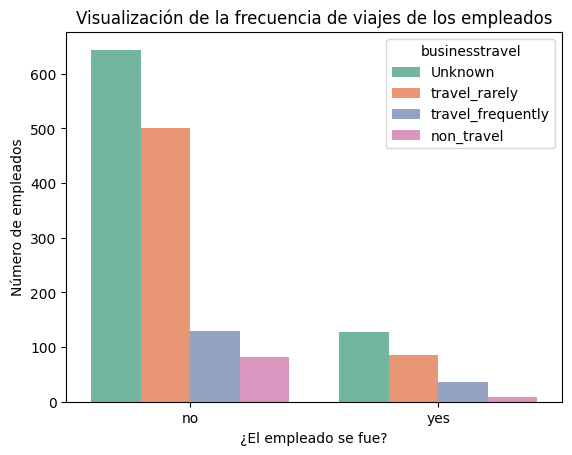

In [ ]:
# Visualización de la frecuencia de viajes de los empleados que se van y de los que se quedan:

df_viajes = df.groupby(['attrition', 'businesstravel'])['age'].count().reset_index().sort_values(by='age', ascending=False)

sns.barplot(x='attrition', y='age', data=df_viajes, palette='Set2', hue = 'businesstravel')
plt.xlabel("¿El empleado se fue?")
plt.ylabel("Número de empleados")
plt.title('Visualización de la frecuencia de viajes de los empleados')
plt.show()

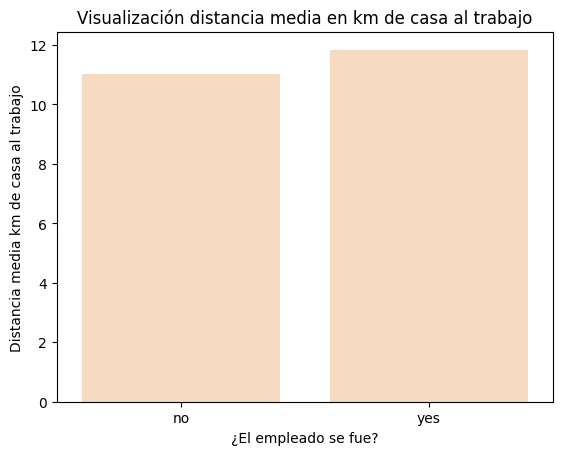

In [ ]:
# Analizamos si la distancia de casa al trabajo en kilómetros influye:

media_km = round(df.groupby('attrition')['distancefromhome'].mean().reset_index(),2)

sns.barplot(x='attrition', y= 'distancefromhome', data=media_km, color= 'peachpuff')
plt.xlabel("¿El empleado se fue?")
plt.ylabel("Distancia media km de casa al trabajo")
plt.title('Visualización distancia media en km de casa al trabajo')
plt.show()

### La media de kilómetros de casa al trabajo entre los empleados que se van y los que se quedan es prácticamente la misma

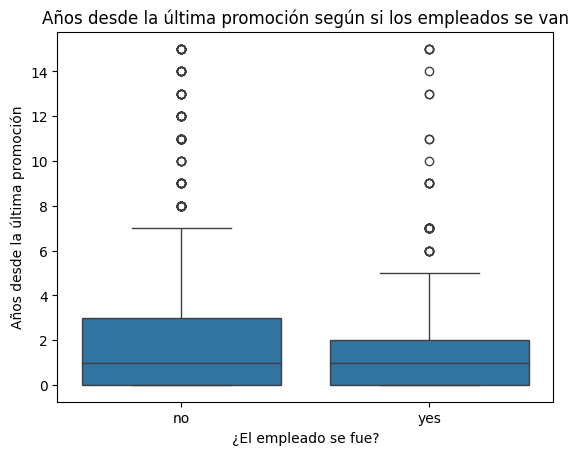

In [ ]:
# Analizamos si los años desde el último ascenso influyen:

sns.boxplot(x="attrition", y="yearssincelastpromotion", data=df)

plt.title("Años desde la última promoción según si los empleados se van")
plt.xlabel("¿El empleado se fue?")
plt.ylabel("Años desde la última promoción")
plt.show()

### Observamos que los empleados que se van, en general, hace menos años que han recibido un ascenso. Aunque las medianas de los dps grupos son prácticamente iguales

Text(0.5, 1.0, 'Visualización del tipo de jornada de los empleados que se fueron')

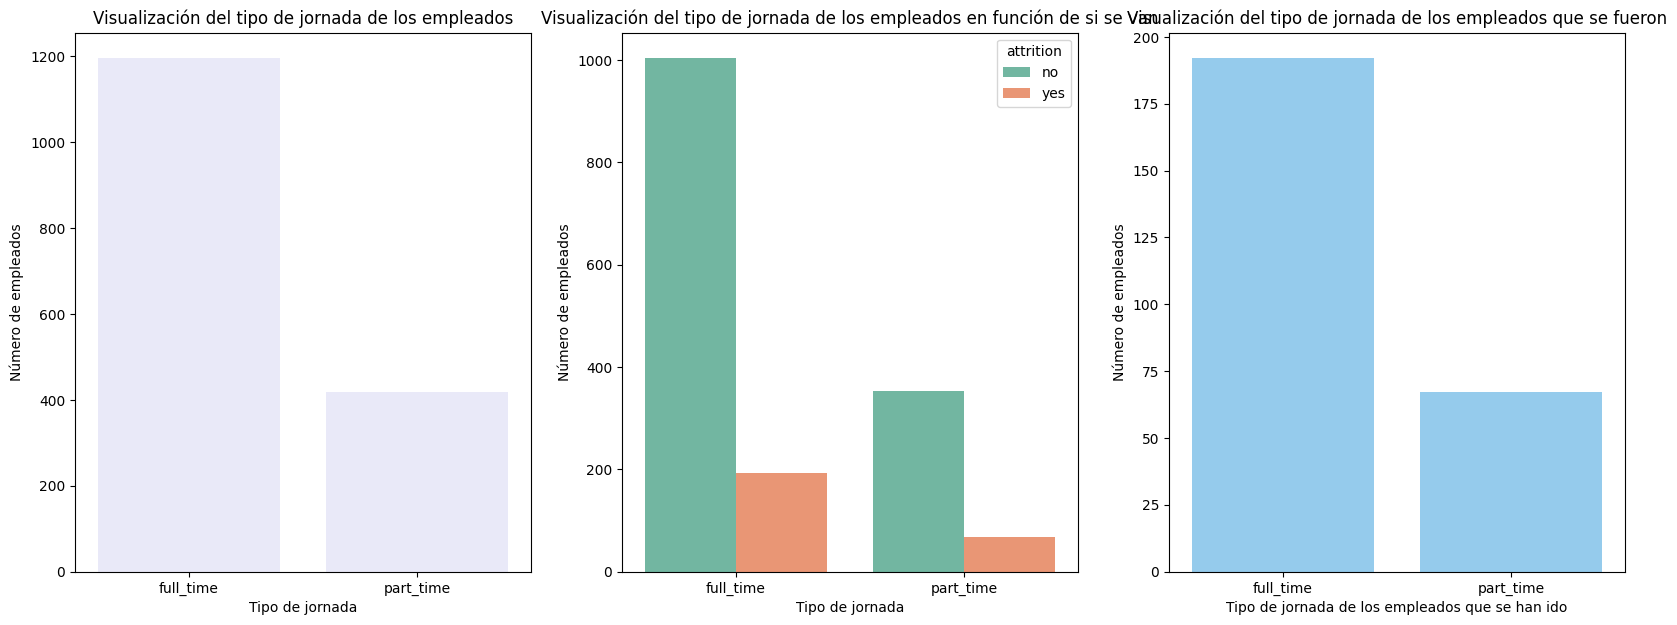

In [ ]:
# Creamos la figura para los siguientes gráficos:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 7))

# ¿Tiene alguna relación el hecho de estar a jornada completa o parcial?

sns.countplot(x='standardhours', data=df, color= 'lavender', ax= axes[0])
axes[0].set_xlabel("Tipo de jornada")
axes[0].set_ylabel("Número de empleados")
axes[0].set_title('Visualización del tipo de jornada de los empleados')

# Ahora haremos lo mismo, pero diferenciando en los dos grupos los que se van y los que se quedan:

sns.countplot(x='standardhours', hue='attrition', palette='Set2', data=df, ax=axes[1])
axes[1].set_xlabel("Tipo de jornada")
axes[1].set_ylabel("Número de empleados")
axes[1].set_title('Visualización del tipo de jornada de los empleados en función de si se van')

# Ahora haremos lo mismo, pero solo teniendo en cuenta las respuestas de los empleados que se van:

df_standardhours_idos = df[df['attrition'] == 'yes']

sns.countplot(x='standardhours', data=df_standardhours_idos, color= 'lightskyblue', ax = axes[2])
axes[2].set_xlabel("Tipo de jornada de los empleados que se han ido")
axes[2].set_ylabel("Número de empleados")
axes[2].set_title('Visualización del tipo de jornada de los empleados que se fueron')

### No vemos relación

C:\Users\AIDA\AppData\Local\Temp\ipykernel_660\2036236651.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overtime', data=df, palette= 'YlGn', ax= axes[0])
C:\Users\AIDA\AppData\Local\Temp\ipykernel_660\2036236651.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overtime', data=df_overtime_idos, palette= 'YlGn', ax = axes[2])


Text(0.5, 1.0, 'Visualización horas extra empleados idos')

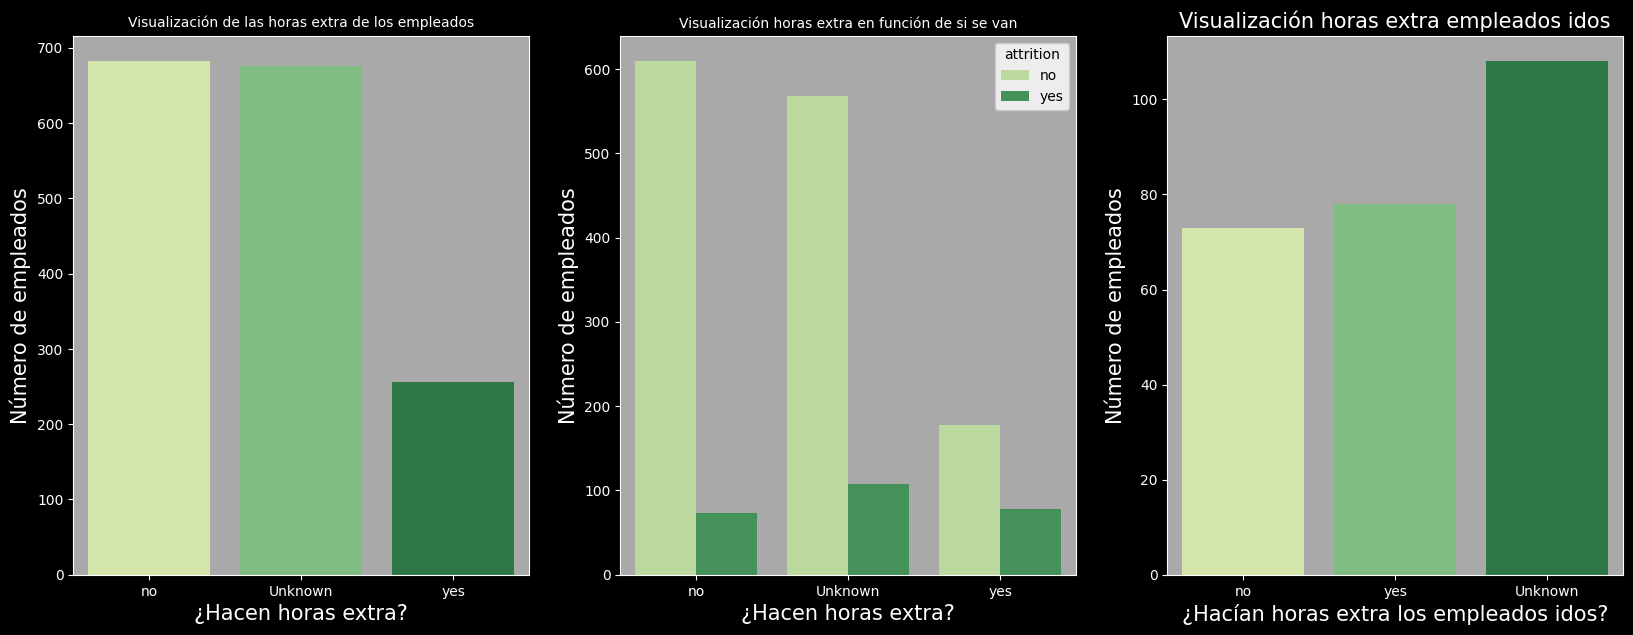

In [ ]:
# Creamos y personalizamos la figura para los siguientes gráficos:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 7))

fig.patch.set_facecolor('black')

for ax in axes.flatten():
    ax.set_facecolor('darkgrey')

    for spine in ax.spines.values():
        spine.set_color('white')
 
    ax.tick_params(colors='white', which='both')  
    ax.xaxis.label.set_color('white')             
    ax.yaxis.label.set_color('white')             
    ax.title.set_color('white')                    

# ¿Tiene alguna relación el hecho de hacer horas extra?

sns.countplot(x='overtime', data=df, palette= 'YlGn', ax= axes[0])
axes[0].set_xlabel("¿Hacen horas extra?", fontsize='15')
axes[0].set_ylabel("Número de empleados", fontsize='15')
axes[0].set_title('Visualización de las horas extra de los empleados', fontsize='10')

# Ahora haremos lo mismo, pero diferenciando en los dos grupos los que se van y los que se quedan:

sns.countplot(x='overtime', hue='attrition', palette='YlGn', data=df, ax=axes[1])
axes[1].set_xlabel("¿Hacen horas extra?", fontsize='15')
axes[1].set_ylabel("Número de empleados", fontsize='15')
axes[1].set_title('Visualización horas extra en función de si se van', fontsize='10')

# Ahora haremos lo mismo, pero solo teniendo en cuenta las respuestas de los empleados que se van:

df_overtime_idos = df[df['attrition'] == 'yes']

sns.countplot(x='overtime', data=df_overtime_idos, palette= 'YlGn', ax = axes[2])
axes[2].set_xlabel("¿Hacían horas extra los empleados idos?", fontsize='15')
axes[2].set_ylabel("Número de empleados", fontsize='15')
axes[2].set_title('Visualización horas extra empleados idos', fontsize='15')

### Vemos claramente que los empleados que se han ido hacían horas extras

C:\Users\AIDA\AppData\Local\Temp\ipykernel_660\3716944143.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='remotework', data=df_remotework_idos, palette= 'GnBu', ax = axes[2])


Text(0.5, 1.0, 'Visualización de si los idos hacían teletrabajo')

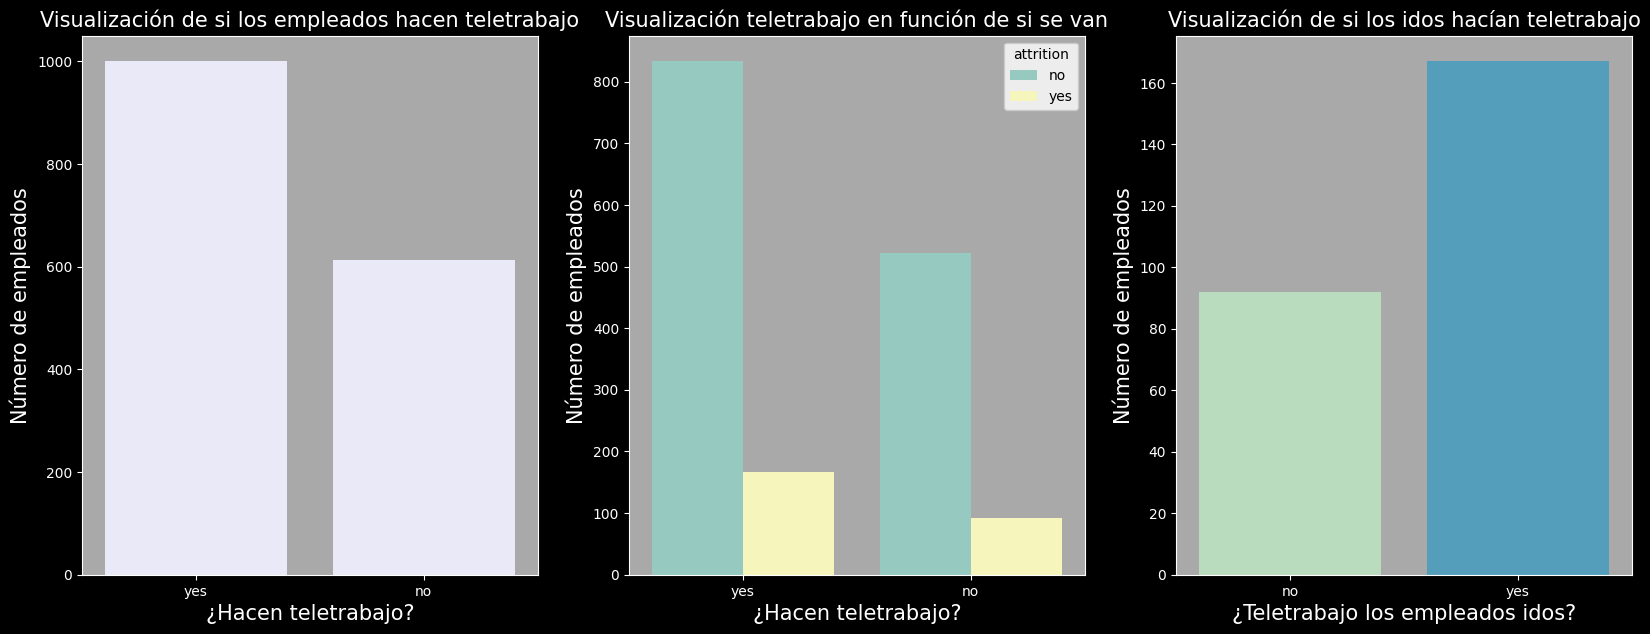

In [ ]:
# Creamos y personalizamos la figura para los siguientes gráficos:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 7))

fig.patch.set_facecolor('black')

for ax in axes.flatten():
    ax.set_facecolor('darkgrey')

    for spine in ax.spines.values():
        spine.set_color('white')

    ax.tick_params(colors='white', which='both')  
    ax.xaxis.label.set_color('white')             
    ax.yaxis.label.set_color('white')             
    ax.title.set_color('white')                   

# ¿Tiene alguna relación el hecho de hacer teletrabajo?

sns.countplot(x='remotework', data=df, color= 'lavender', ax= axes[0])
axes[0].set_xlabel("¿Hacen teletrabajo?", fontsize='15')
axes[0].set_ylabel("Número de empleados", fontsize='15')
axes[0].set_title('Visualización de si los empleados hacen teletrabajo', fontsize='15')

# Ahora haremos lo mismo, pero diferenciando en los dos grupos los que se van y los que se quedan:

sns.countplot(x='remotework', hue='attrition', palette='Set3', data=df, ax=axes[1])
axes[1].set_xlabel("¿Hacen teletrabajo?", fontsize='15')
axes[1].set_ylabel("Número de empleados", fontsize='15')
axes[1].set_title('Visualización teletrabajo en función de si se van', fontsize='15')

# Ahora haremos lo mismo, pero solo teniendo en cuenta las respuestas de los empleados que se van:

df_remotework_idos = df[df['attrition'] == 'yes']

sns.countplot(x='remotework', data=df_remotework_idos, palette= 'GnBu', ax = axes[2])
axes[2].set_xlabel("¿Teletrabajo los empleados idos?", fontsize='15')
axes[2].set_ylabel("Número de empleados", fontsize='15')
axes[2].set_title('Visualización de si los idos hacían teletrabajo', fontsize='15')

### La mayoría de los empleados que se han ido hacían teletrabajo

C:\Users\AIDA\AppData\Local\Temp\ipykernel_660\2832852099.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='maritalstatus', data=df, palette= 'YlGnBu', ax= axes[0])
C:\Users\AIDA\AppData\Local\Temp\ipykernel_660\2832852099.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='maritalstatus', data=df_maritalstatus_idos, palette= 'YlGnBu', ax = axes[2])


Text(0.5, 1.0, 'Visualización estado civil empleados idos')

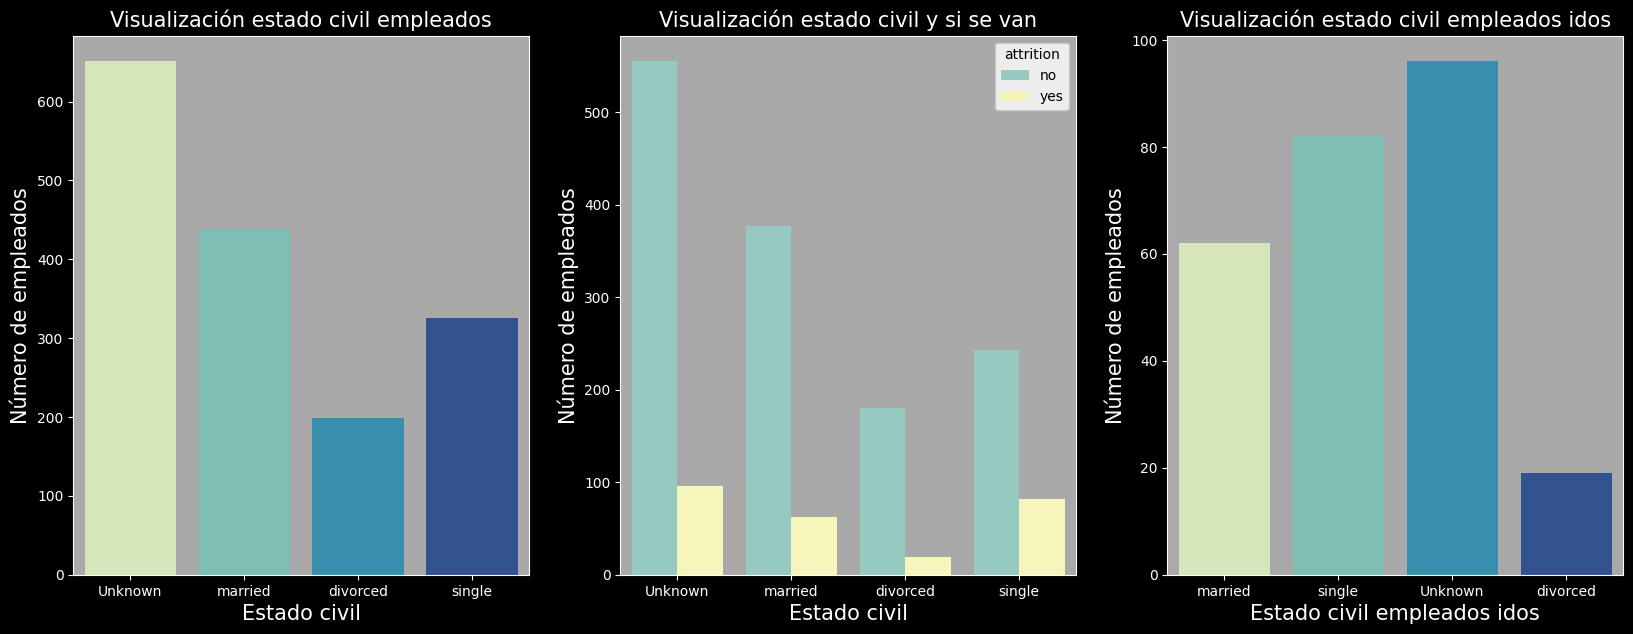

In [ ]:
# Creamos y personalizamos la figura para los siguientes gráficos:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 7))

fig.patch.set_facecolor('black')

for ax in axes.flatten():
    ax.set_facecolor('darkgrey')

    for spine in ax.spines.values():
        spine.set_color('white')

    ax.tick_params(colors='white', which='both') 
    ax.xaxis.label.set_color('white')             
    ax.yaxis.label.set_color('white')             
    ax.title.set_color('white')                    

# ¿Tiene alguna relación el estado civil del empleado?

sns.countplot(x='maritalstatus', data=df, palette= 'YlGnBu', ax= axes[0])
axes[0].set_xlabel("Estado civil", fontsize='15')
axes[0].set_ylabel("Número de empleados", fontsize='15')
axes[0].set_title('Visualización estado civil empleados', fontsize='15')

# Ahora haremos lo mismo, pero diferenciando en los dos grupos los que se van y los que se quedan:

sns.countplot(x='maritalstatus', hue='attrition', palette='Set3', data=df, ax=axes[1])
axes[1].set_xlabel("Estado civil", fontsize='15')
axes[1].set_ylabel("Número de empleados", fontsize='15')
axes[1].set_title('Visualización estado civil y si se van', fontsize='15')

# Ahora haremos lo mismo, pero solo teniendo en cuenta las respuestas de los empleados que se van:

df_maritalstatus_idos = df[df['attrition'] == 'yes']

sns.countplot(x='maritalstatus', data=df_maritalstatus_idos, palette= 'YlGnBu', ax = axes[2])
axes[2].set_xlabel("Estado civil empleados idos", fontsize='15')
axes[2].set_ylabel("Número de empleados", fontsize='15')
axes[2].set_title('Visualización estado civil empleados idos', fontsize='15')

### La mayoría de empleados que se han ido están solteros